<a href="https://colab.research.google.com/github/jacquesescp/LessonsData/blob/main/Session_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module: Data Science for Asset Management {-}

# Session 2: Financial Data Analysis and Visualization {-}

# Introduction

At the initial stage, this session aims to study the construction of a portfolio composed of seven well-known stocks, i.e. the Magnificant Seven (Google, Amazon, Apple, Facebook/Meta, Microsoft, NVIDIA and Tesla) and the S\&P500 stock index. This study aims to minimize the risk associated with this portfolio by using portfolio management techniques. Of course, in the future tasks, we will replace these sample stocks/index with other relevant stocks/indices/ETFs in your own projects.

From your other modules (i.e. risk management and portfolio analysis), the importance of portfolio selection or construction lies in finding a balance between expected return and risk. Volatility, which measures the dispersion of an asset's returns, is often used to measure risk (surely, we may have other risk measures in the future studies, such as Value at Risk VaR, Conditional Value at Risk as also called Expected Shortfall, etc, for example, [this paper offers more general risk measures](https://openaccess.city.ac.uk/id/eprint/33733/1/Risk_Parity_APTZ_CRO_2.pdf)). On the other hand, expected return represents the average expected return on an asset. Analyzing the relationship between volatility and expected return will improve/balance our overall performance and risk management.

In this context, we will examine different portfolio compositions, adjusting the investment proportions in each asset. The objective is to find the optimal combination that minimises the portfolio's overall risk while maximising the expected return. We will use concepts such as covariance and the correlation coefficient between asset returns to do this. We will study these definitions in other modules. Particular attention will be paid to the effect of correlations between asset returns on the portfolio's risk level. The correlation coefficient reflects the extent to which asset returns move together. We will study how the correlation between the selected stocks and the S\&P500 index can influence the portfolio's overall risk.

To conduct this session, as always, we will use the Python programming language and Jupyter Notebook in particular, which offers a range of tools and libraries for financial analysis and portfolio management. Using Python, we can perform volatility, covariance, and portfolio optimisation calculations to find the optimal composition that minimises risk. As you might see from the YouTube playlist mentioned in the *Session 1 - Introduction to Data Science in Asset Management*, many of these Python libraries were created by financial investment companies or fund managers, such as Two Sigma, D.E Shaw, etc.

In conclusion, this session will allow us to explore the fundamental concepts of portfolio management by studying the construction of a portfolio composed of a few stocks and a stock index. We will minimise risk using quantitative analysis and optimisation techniques while maximising expected return. Analysing the effect of correlations between asset returns will allow us to understand better the impact of diversification on the portfolio's risk level. This Session 2 will give you the real-world Python programming experience to implement the knowledge and theories that discussed in the other modules (i.e. risk management and portfolio analysis).

To prepare this session, students should follow the *Session 0 - Python Basics Preparation* carefully, this means: (1) installed the Anaconda-Navigator on your laptop; (2) created a Python environment into your system; (3) installed the main Python libraries as mentioned in the YouTube playlist in Session 0; (4) installed the Jupyter Lab or Notebook in your Python environment; (5) tried a few (or ideally all five) Jupyter notebooks as attached in the Session 0.

# Import Libraries and Data

One way to get the dataset: In this notebook we will work on a Python package [yfinance 0.2.66](https://pypi.org/project/yfinance/), which contains the major stock markets data from [Yahoo! Finance](https://finance.yahoo.com). However, you may also use any other ways to get or collect the datasets in your own projects, such as from Bloomberg, or common data streaming via API, databases in e-libraries such as Wharton Research Data Services WRDS, etc.

Students learnt from *Session 0 - Python Basics*, how to: (1) install Python libraries into their laptops, i.e. the newly created Python environment in the Anaconda Navigator; (2) open the Jupyter notebooks via Jupyter Lab or Notebook interface; (3) load Python libraries into the notebook; (4) deal with common errors or warning messages when importing the libraries.

Here, we need to import the basic Python libraries and be able to analyze the data:

In [1]:
#Imports
import os
import numpy as np # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas.core.frame import DataFrame
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
from pandas_datareader import data, wb
import scipy.optimize as sco
from scipy import stats
#from pandas.util.testing import assert_frame_equal

import math
import seaborn as sns
import datetime as dt
from datetime import datetime
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import seaborn as sns
from pylab import rcParams
%config InlineBackend.figure_format='retina'
#sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D","#93D30C","#8F00FF"]
#sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 18, 10
RANDOM_SEED = 2 # I'm seeding with 2, if you try the same you will get the same results.
np.random.seed(RANDOM_SEED)

First of all, if you don't have the *yahoofinance* libraries (i.e. [yfinance](https://pypi.org/project/yfinance/) and [yahoofinancials](https://pypi.org/project/yahoofinancials/)), you can install them via pip. As we mentioned in the *Session 0 Python Basics* YouTube playlist, how to install Python libraries in different ways, please watch the YouTube playlist step by step carefully, since if you have any issues by following the steps in these videos, the lecturer can help students accordingly during the lectures without wasting time for other students.

In [2]:
# This way may not work in some systems, so it will be better to follow the Session 0 Python Basics videos
# and install these external python libraries via Anaconda-Navigator environment and terminal
!pip install yfinance
!pip install yahoofinancials

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yahoofinancials: filename=yahoofinancials-1.20-py3-none-any.whl size=38618 sha256=ff16f33d1db3ede1920b13d6345de617e74b858a34e8dd238244e58073048ad6
  Stored in directory: /root/.cache/pip/wheels/b0/e1/ca/e683b02e57db550881c8ebb89ba3eccb7a5c0ebfad7f03acea
Successfully built yahoofinancials


In this session, we have chosen seven stocks, i.e. the Magnificant Seven (Google, Amazon, Apple, Facebook/Meta, Microsoft, NVIDIA and Tesla) and one market index S\&P500. In your own projects, you may replace these stocks with the stocks or a portfolio that you selected for the project.  

You can import any stock from the ``yfinance`` library and choose the period and name as a ticker.

In [3]:
import pandas as pd
from yahoofinancials import YahooFinancials
import yfinance as yf
GOOG = yf.download("GOOG", start="2015-01-01", end="2025-01-01",group_by="ticker") # Stock of Google
AMZN = yf.download("AMZN", start="2015-01-01", end="2025-01-01",group_by="ticker") # Stock of Amazon
AAPL = yf.download("AAPL", start="2015-01-01", end="2025-01-01",group_by="ticker") # Stock of Apple
META = yf.download("META", start="2015-01-01", end="2025-01-01",group_by="ticker") # Stock of Facebook/Meta
MSFT = yf.download("MSFT", start="2015-01-01", end="2025-01-01",group_by="ticker") # Stock of Microsoft
NVDA = yf.download("NVDA", start="2015-01-01", end="2025-01-01",group_by="ticker") # Stock of NVDA
TSLA = yf.download("TSLA", start="2015-01-01", end="2025-01-01",group_by="ticker") # Stock of Tesla
GSPC = yf.download("^GSPC", start="2015-01-01", end="2025-01-01",group_by="ticker") # Market index of S&P 500
print(GOOG.shape, AMZN.shape, AAPL.shape, META.shape, MSFT.shape, NVDA.shape, TSLA.shape, GSPC.shape)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

(2516, 5) (2516, 5) (2516, 5) (2516, 5) (2516, 5) (2516, 5) (2516, 5) (2516, 5)


The stock size is 2516 observations and 8 variables. Visualize the head and tail for each stock:

In [4]:
#if you want to save these newly downloaded real data into your own laptop, as we mentioned in the Session 0 Python Basics,
#you can use the pandas function df.to_csv('filename.csv')

#info: Ctrl + / in MS Windows. On a Mac, use Cmd + /. to write/clear block comments

# GOOG.to_csv('GOOG.csv')
# AMZN.to_csv('AMZN.csv')
# AAPL.to_csv('AAPL.csv')
# META.to_csv('META.csv')
# MSFT.to_csv('MSFT.csv')
# NVDA.to_csv('NVDA.csv')
# TSLA.to_csv('TSLA.csv')
# GSPC.to_csv('GSPC.csv')

# read the CSV file and set the first column and row as index
# GOOG = pd.read_csv('GOOG.csv', header=[0], index_col=[0])
# AMZN = pd.read_csv('AMZN.csv', header=[0], index_col=[0])
# AAPL = pd.read_csv('AAPL.csv', header=[0], index_col=[0])
# META = pd.read_csv('META.csv', header=[0], index_col=[0])
# MSFT = pd.read_csv('MSFT.csv', header=[0], index_col=[0])
# NVDA = pd.read_csv('NVDA.csv', header=[0], index_col=[0])
# TSLA = pd.read_csv('TSLA.csv', header=[0], index_col=[0])
# GSPC = pd.read_csv('GSPC.csv', header=[0], index_col=[0])


In [5]:
#If we want to save the outputs more efficiently
# GOOG.to_pickle('GOOG.pkl')
# AMZN.to_pickle('AMZN.pkl')
# AAPL.to_pickle('AAPL.pkl')
# META.to_pickle('META.pkl')
# MSFT.to_pickle('MSFT.pkl')
# NVDA.to_pickle('NVDA.pkl')
# TSLA.to_pickle('TSLA.pkl')
# GSPC.to_pickle('GSPC.pkl')

#Then, if we need read these saved outputs
# GOOG = pd.read_pickle('GOOG.pkl')
# AMZN = pd.read_pickle('AMZN.pkl')
# AAPL = pd.read_pickle('AAPL.pkl')
# META = pd.read_pickle('META.pkl')
# MSFT = pd.read_pickle('MSFT.pkl')
# NVDA = pd.read_pickle('NVDA.pkl')
# TSLA = pd.read_pickle('TSLA.pkl')
# GSPC = pd.read_pickle('GSPC.pkl')

In [6]:
#If we read the csv file, then we need do some arrangements about the data
# colnames = GOOG.iloc[0]   #To select the ith row, use iloc
# GOOG.columns = colnames   #Change the colnames in the table
# GOOG = GOOG.iloc[2:]      #Delete the first two rows

#However, if we saved as .pkl file, then no need to adjust or arrange the data, we can use them directly
GOOG

Ticker            GOOG                                              
Price             Open        High         Low       Close    Volume
Date                                                                
2015-01-02   26.198793   26.310719   25.955630   25.990791  28951268
2015-01-05   25.914031   25.967023   25.408886   25.448999  41196796
2015-01-06   25.504959   25.563151   24.814098   24.859163  57998800
2015-01-07   25.108766   25.120850   24.744764   24.816574  41301082
2015-01-08   24.662553   24.934440   24.316378   24.894821  67071641
...                ...         ...         ...         ...       ...
2024-12-24  195.536761  197.031919  194.567899  196.932251   6809800
2024-12-26  196.104922  197.520336  195.237720  196.463760   7907900
2024-12-27  195.835784  196.164720  191.352302  193.413620  14693000
2024-12-30  190.248872  193.154456  189.745498  192.067978  12209500
2024-12-31  191.823789  192.626183  188.968032  189.825256  14355200

[2516 rows x 5 columns]

In [7]:
AMZN

Ticker            AMZN                                              
Price             Open        High         Low       Close    Volume
Date                                                                
2015-01-02   15.629000   15.737500   15.348000   15.426000  55664000
2015-01-05   15.350500   15.419000   15.042500   15.109500  55484000
2015-01-06   15.112000   15.150000   14.619000   14.764500  70380000
2015-01-07   14.875000   15.064000   14.766500   14.921000  52806000
2015-01-08   15.016000   15.157000   14.805500   15.023000  61768000
...                ...         ...         ...         ...       ...
2024-12-24  226.940002  229.139999  226.130005  229.050003  15007500
2024-12-26  228.500000  228.500000  226.669998  227.050003  16146700
2024-12-27  225.600006  226.029999  220.899994  223.750000  27367100
2024-12-30  220.059998  223.000000  218.429993  221.300003  28321200
2024-12-31  222.970001  223.229996  218.940002  219.389999  24819700

[2516 rows x 5 columns]

In [8]:
AAPL

Ticker            AAPL                                               
Price             Open        High         Low       Close     Volume
Date                                                                 
2015-01-02   24.718169   24.729265   23.821666   24.261042  212818400
2015-01-05   24.030261   24.110148   23.391171   23.577572  257142000
2015-01-06   23.641926   23.839422   23.218083   23.579792  263188400
2015-01-07   23.788382   24.010288   23.677428   23.910431  160423600
2015-01-08   24.238865   24.886832   24.121253   24.829136  237458000
...                ...         ...         ...         ...        ...
2024-12-24  254.586262  257.296626  254.386957  257.286682   23234700
2024-12-26  257.276679  259.179926  256.718662  258.103729   27237100
2024-12-27  256.917949  257.784897  252.164833  254.685883   42355300
2024-12-30  251.337754  252.603266  249.862994  251.307861   35557500
2024-12-31  251.547023  252.384048  248.547661  249.534164   39480700

[2516 rows x 5 columns]

In [9]:
META

Ticker            META                                              
Price             Open        High         Low       Close    Volume
Date                                                                
2015-01-02   78.098553   78.446408   77.223940   77.969345  18177500
2015-01-05   77.502225   78.764440   76.389084   76.717064  26452200
2015-01-06   76.756810   77.114598   74.898265   75.683426  27399300
2015-01-07   76.289689   76.886011   75.355446   75.683426  22045300
2015-01-08   76.269817   77.750693   75.613864   77.700996  23961000
...                ...         ...         ...         ...       ...
2024-12-24  601.315372  606.573110  597.883447  606.333679   4726100
2024-12-26  604.069011  604.887107  597.544273  601.943970   6081400
2024-12-27  598.013078  600.447394  588.425488  598.412170   8084200
2024-12-30  587.377934  595.548850  584.215339  589.862122   7025900
2024-12-31  590.889764  592.585753  582.489342  584.145508   6019500

[2516 rows x 5 columns]

In [10]:
MSFT

Ticker            MSFT                                              
Price             Open        High         Low       Close    Volume
Date                                                                
2015-01-02   39.847646   40.496684   39.745167   39.933044  27913900
2015-01-05   39.600003   39.907444   39.497524   39.565845  39673900
2015-01-06   39.608531   39.924510   38.891171   38.985111  36447900
2015-01-07   39.266927   39.676846   38.848468   39.480427  29114100
2015-01-08   39.924505   40.778505   39.898886   40.641865  29645200
...                ...         ...         ...         ...       ...
2024-12-24  432.274691  437.197652  431.817213  436.929108   7164500
2024-12-26  436.680490  438.530341  434.243897  435.715790   8194200
2024-12-27  432.224981  432.841588  424.020066  428.177216  18117700
2024-12-30  423.731651  425.213499  419.594381  422.508362  13158700
2024-12-31  423.771431  424.397993  418.361158  419.196564  13246500

[2516 rows x 5 columns]

In [11]:
NVDA

Ticker            NVDA                                               
Price             Open        High         Low       Close     Volume
Date                                                                 
2015-01-02    0.483038    0.486638    0.475360    0.483038  113680000
2015-01-05    0.483038    0.484478    0.472720    0.474880  197952000
2015-01-06    0.475600    0.476080    0.460002    0.460482  197764000
2015-01-07    0.463842    0.467921    0.457843    0.459282  321808000
2015-01-08    0.464561    0.479439    0.464321    0.476559  283780000
...                ...         ...         ...         ...        ...
2024-12-24  139.969515  141.869095  138.619803  140.189468  105157000
2024-12-26  139.669575  140.819334  137.700003  139.899521  116205600
2024-12-27  138.519837  138.989736  134.680677  136.980164  170582600
2024-12-30  134.800628  140.239446  133.990807  137.460052  167734700
2024-12-31  137.999949  138.039949  133.800866  134.260757  155659200

[2516 rows x 5 columns]

In [12]:
TSLA

Ticker            TSLA                                              
Price             Open        High         Low       Close    Volume
Date                                                                
2015-01-02   14.858000   14.883333   14.217333   14.620667  71466000
2015-01-05   14.303333   14.433333   13.810667   14.006000  80527500
2015-01-06   14.004000   14.280000   13.614000   14.085333  93928500
2015-01-07   14.223333   14.318667   13.985333   14.063333  44526000
2015-01-08   14.187333   14.253333   14.000667   14.041333  51637500
...                ...         ...         ...         ...       ...
2024-12-24  435.899994  462.779999  435.140015  462.279999  59551800
2024-12-26  465.160004  465.329987  451.019989  454.130005  76366400
2024-12-27  449.519989  450.000000  426.500000  431.660004  82666800
2024-12-30  419.399994  427.000000  415.750000  417.410004  64941000
2024-12-31  423.790009  427.929993  402.540009  403.839996  76825100

[2516 rows x 5 columns]

In [13]:
#GSPC.to_csv('GSPC.csv', index=False)
#GSPC['^GSPC']['Close']
#GSPC['^GSPC'].Close
GSPC

Ticker            ^GSPC                                                   
Price              Open         High          Low        Close      Volume
Date                                                                      
2015-01-02  2058.899902  2072.360107  2046.040039  2058.199951  2708700000
2015-01-05  2054.439941  2054.439941  2017.339966  2020.579956  3799120000
2015-01-06  2022.150024  2030.250000  1992.439941  2002.609985  4460110000
2015-01-07  2005.550049  2029.609985  2005.550049  2025.900024  3805480000
2015-01-08  2030.609985  2064.080078  2030.609985  2062.139893  3934010000
...                 ...          ...          ...          ...         ...
2024-12-24  5984.629883  6040.100098  5981.439941  6040.040039  1757720000
2024-12-26  6024.970215  6049.750000  6007.370117  6037.589844  2904530000
2024-12-27  6006.169922  6006.169922  5932.950195  5970.839844  3159610000
2024-12-30  5920.669922  5940.790039  5869.160156  5906.939941  3433250000
2024-12-31  5919.740234  5929.740234  5868.859863  5881.629883  3128350000

[2516 rows x 5 columns]

# Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) for stocks like Google, Amazon, Apple, Facebook/Meta, Microsoft, NVIDIA and Tesla, and the S&P500 involves examining their historical price and volume data. Through data visualizations, statistical measures, and studying relationships, EDA helps identify trends, patterns, and interdependencies among these stocks. It provides insights into their behaviour, distribution of returns, and market dependencies, assisting in decision-making and further analysis.

We start with the descriptive statistics of the variables; Open, High, Low, Close, Adj Close, and Volume for each company of Magnificant Seven. As you can see, since the datasets were collected from the yahoo finance libraries, they are cleaned by the data collection company and no need to deal with missing data. However, in the real-life financial world, the raw data are usually very messy and require a huge amount of effort and time to clean/refine the raw data, such as missing values, input errors, outliers, etc.

In [14]:
AMZN.isnull().sum()

Ticker  Price 
AMZN    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
dtype: int64

In [15]:
GOOG.isnull().sum()

Ticker  Price 
GOOG    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
dtype: int64

In [16]:
AAPL.isnull().sum()

Ticker  Price 
AAPL    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
dtype: int64

In [17]:
META.isnull().sum()

Ticker  Price 
META    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
dtype: int64

In [18]:
NVDA.isnull().sum()

Ticker  Price 
NVDA    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
dtype: int64

In [19]:
TSLA.isnull().sum()

Ticker  Price 
TSLA    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
dtype: int64

In [20]:
MSFT.isnull().sum()

Ticker  Price 
MSFT    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
dtype: int64

In [21]:
GSPC.isnull().sum()

Ticker  Price 
^GSPC   Open      0
        High      0
        Low       0
        Close     0
        Volume    0
dtype: int64

> The presence of no missing values in each stock dataset is a positive finding, indicating that we have complete and reliable data for analysis. This allows for accurate assessments of various aspects of the stocks, simplifies data preparation, and ensures more robust and trustworthy studies. However, in the real world, a huge amount of effort and time will be allocated to deal with missing values.

In [22]:
#Combining dataframes
dataset = pd.concat([GOOG['GOOG'].Close,
                     AMZN['AMZN'].Close,
                     AAPL['AAPL'].Close,
                     META['META'].Close,
                     MSFT['MSFT'].Close,
                     NVDA['NVDA'].Close,
                     TSLA['TSLA'].Close,
                     GSPC['^GSPC'].Close],axis=1)
# Change the column names
dataset.columns =['GOOG','AMZN', 'AAPL', 'META','MSFT','NVDA','TSLA','GSPC']
dataset.head()

GOOG     AMZN       AAPL       META       MSFT      NVDA  \
Date                                                                        
2015-01-02  25.990791  15.4260  24.261042  77.969345  39.933044  0.483038   
2015-01-05  25.448999  15.1095  23.577572  76.717064  39.565845  0.474880   
2015-01-06  24.859163  14.7645  23.579792  75.683426  38.985111  0.460482   
2015-01-07  24.816574  14.9210  23.910431  75.683426  39.480427  0.459282   
2015-01-08  24.894821  15.0230  24.829136  77.700996  40.641865  0.476559   

                 TSLA         GSPC  
Date                                
2015-01-02  14.620667  2058.199951  
2015-01-05  14.006000  2020.579956  
2015-01-06  14.085333  2002.609985  
2015-01-07  14.063333  2025.900024  
2015-01-08  14.041333  2062.139893

In [23]:
#if you want to save these newly downloaded real data into your own laptop, as we mentioned in the Session 0 Python Basics,
#you can use the pandas function df.to_csv('filename.csv')
# dataset.to_csv('combined_dataset.csv')

In [24]:
print('Shape of data',dataset.shape)

Shape of data (2516, 8)


We have 2516 observations (day) and 8 variables.

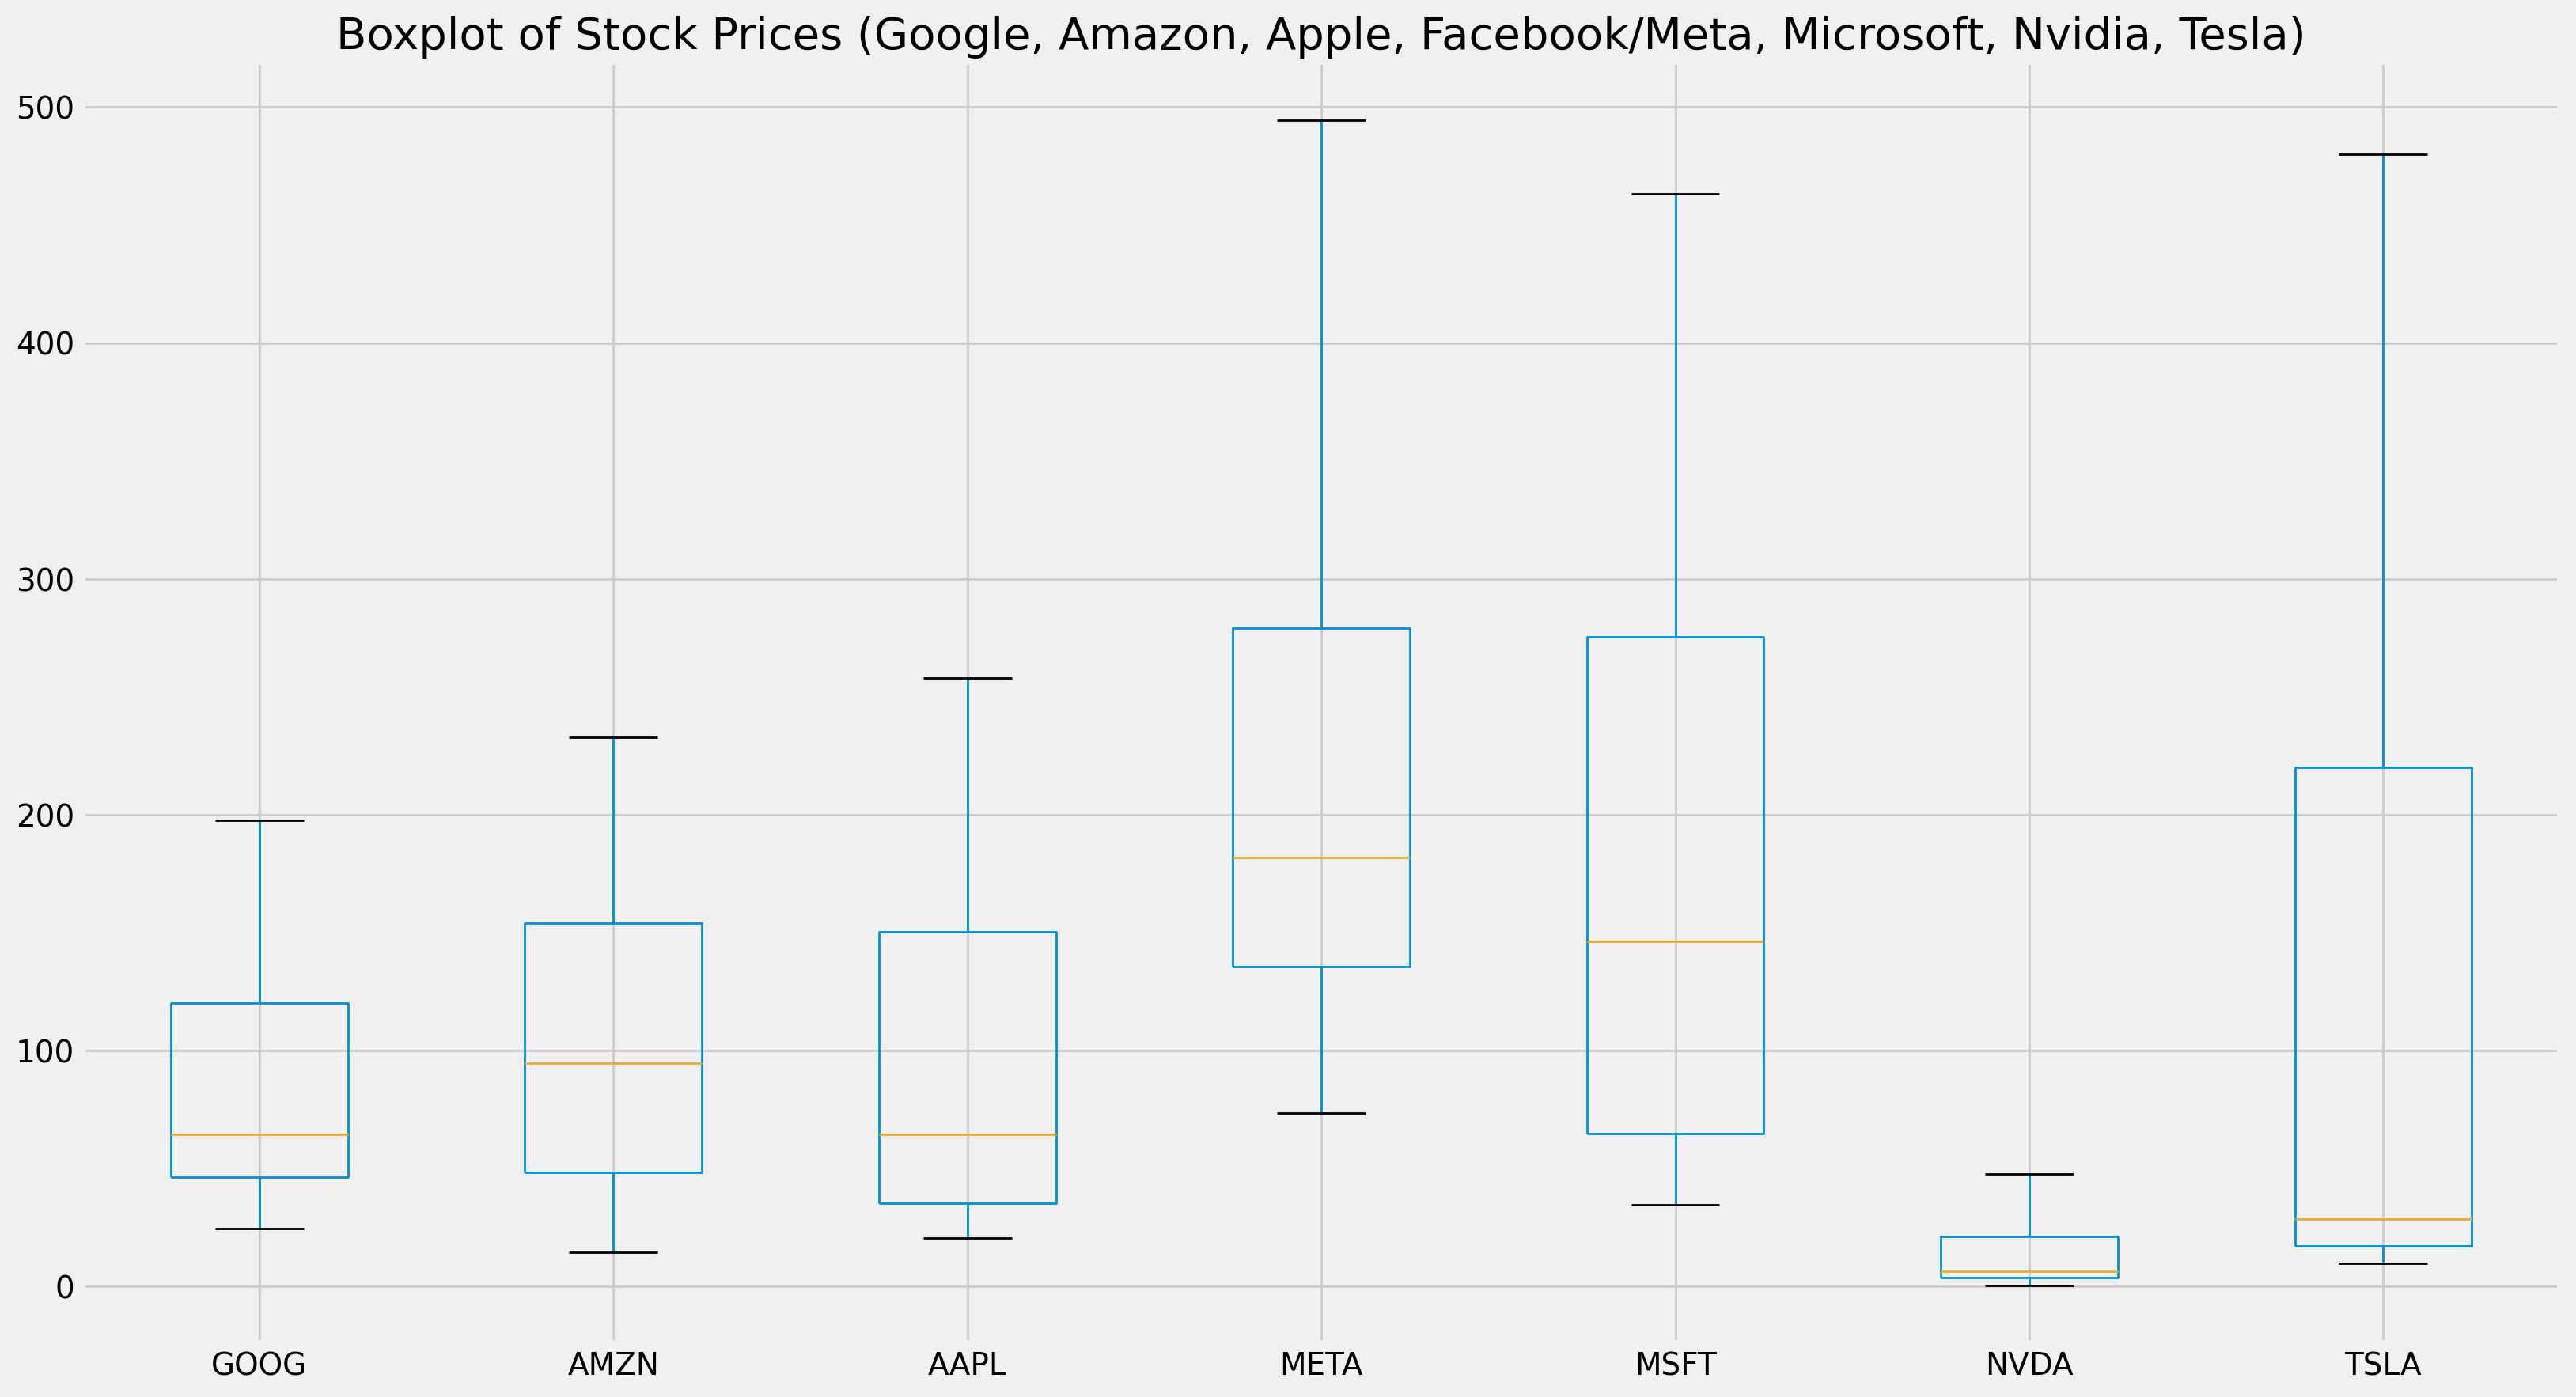

In [25]:
plt.style.use("fivethirtyeight")
dataset[['GOOG','AMZN','AAPL','META','MSFT','NVDA','TSLA']].boxplot(sym="")
plt.title("Boxplot of Stock Prices (Google, Amazon, Apple, Facebook/Meta, Microsoft, Nvidia, Tesla)")
plt.show()

> The boxplot reveals the presence of outliers in NVIDIA, Facebook, Tesla stock prices, indicating significant deviations from the overall pattern. These outliers suggest the occurrence of notable events or market conditions that impacted the stock prices of these companies. Further analysis is required to understand the factors influencing these outliers and their implications for investment decisions.

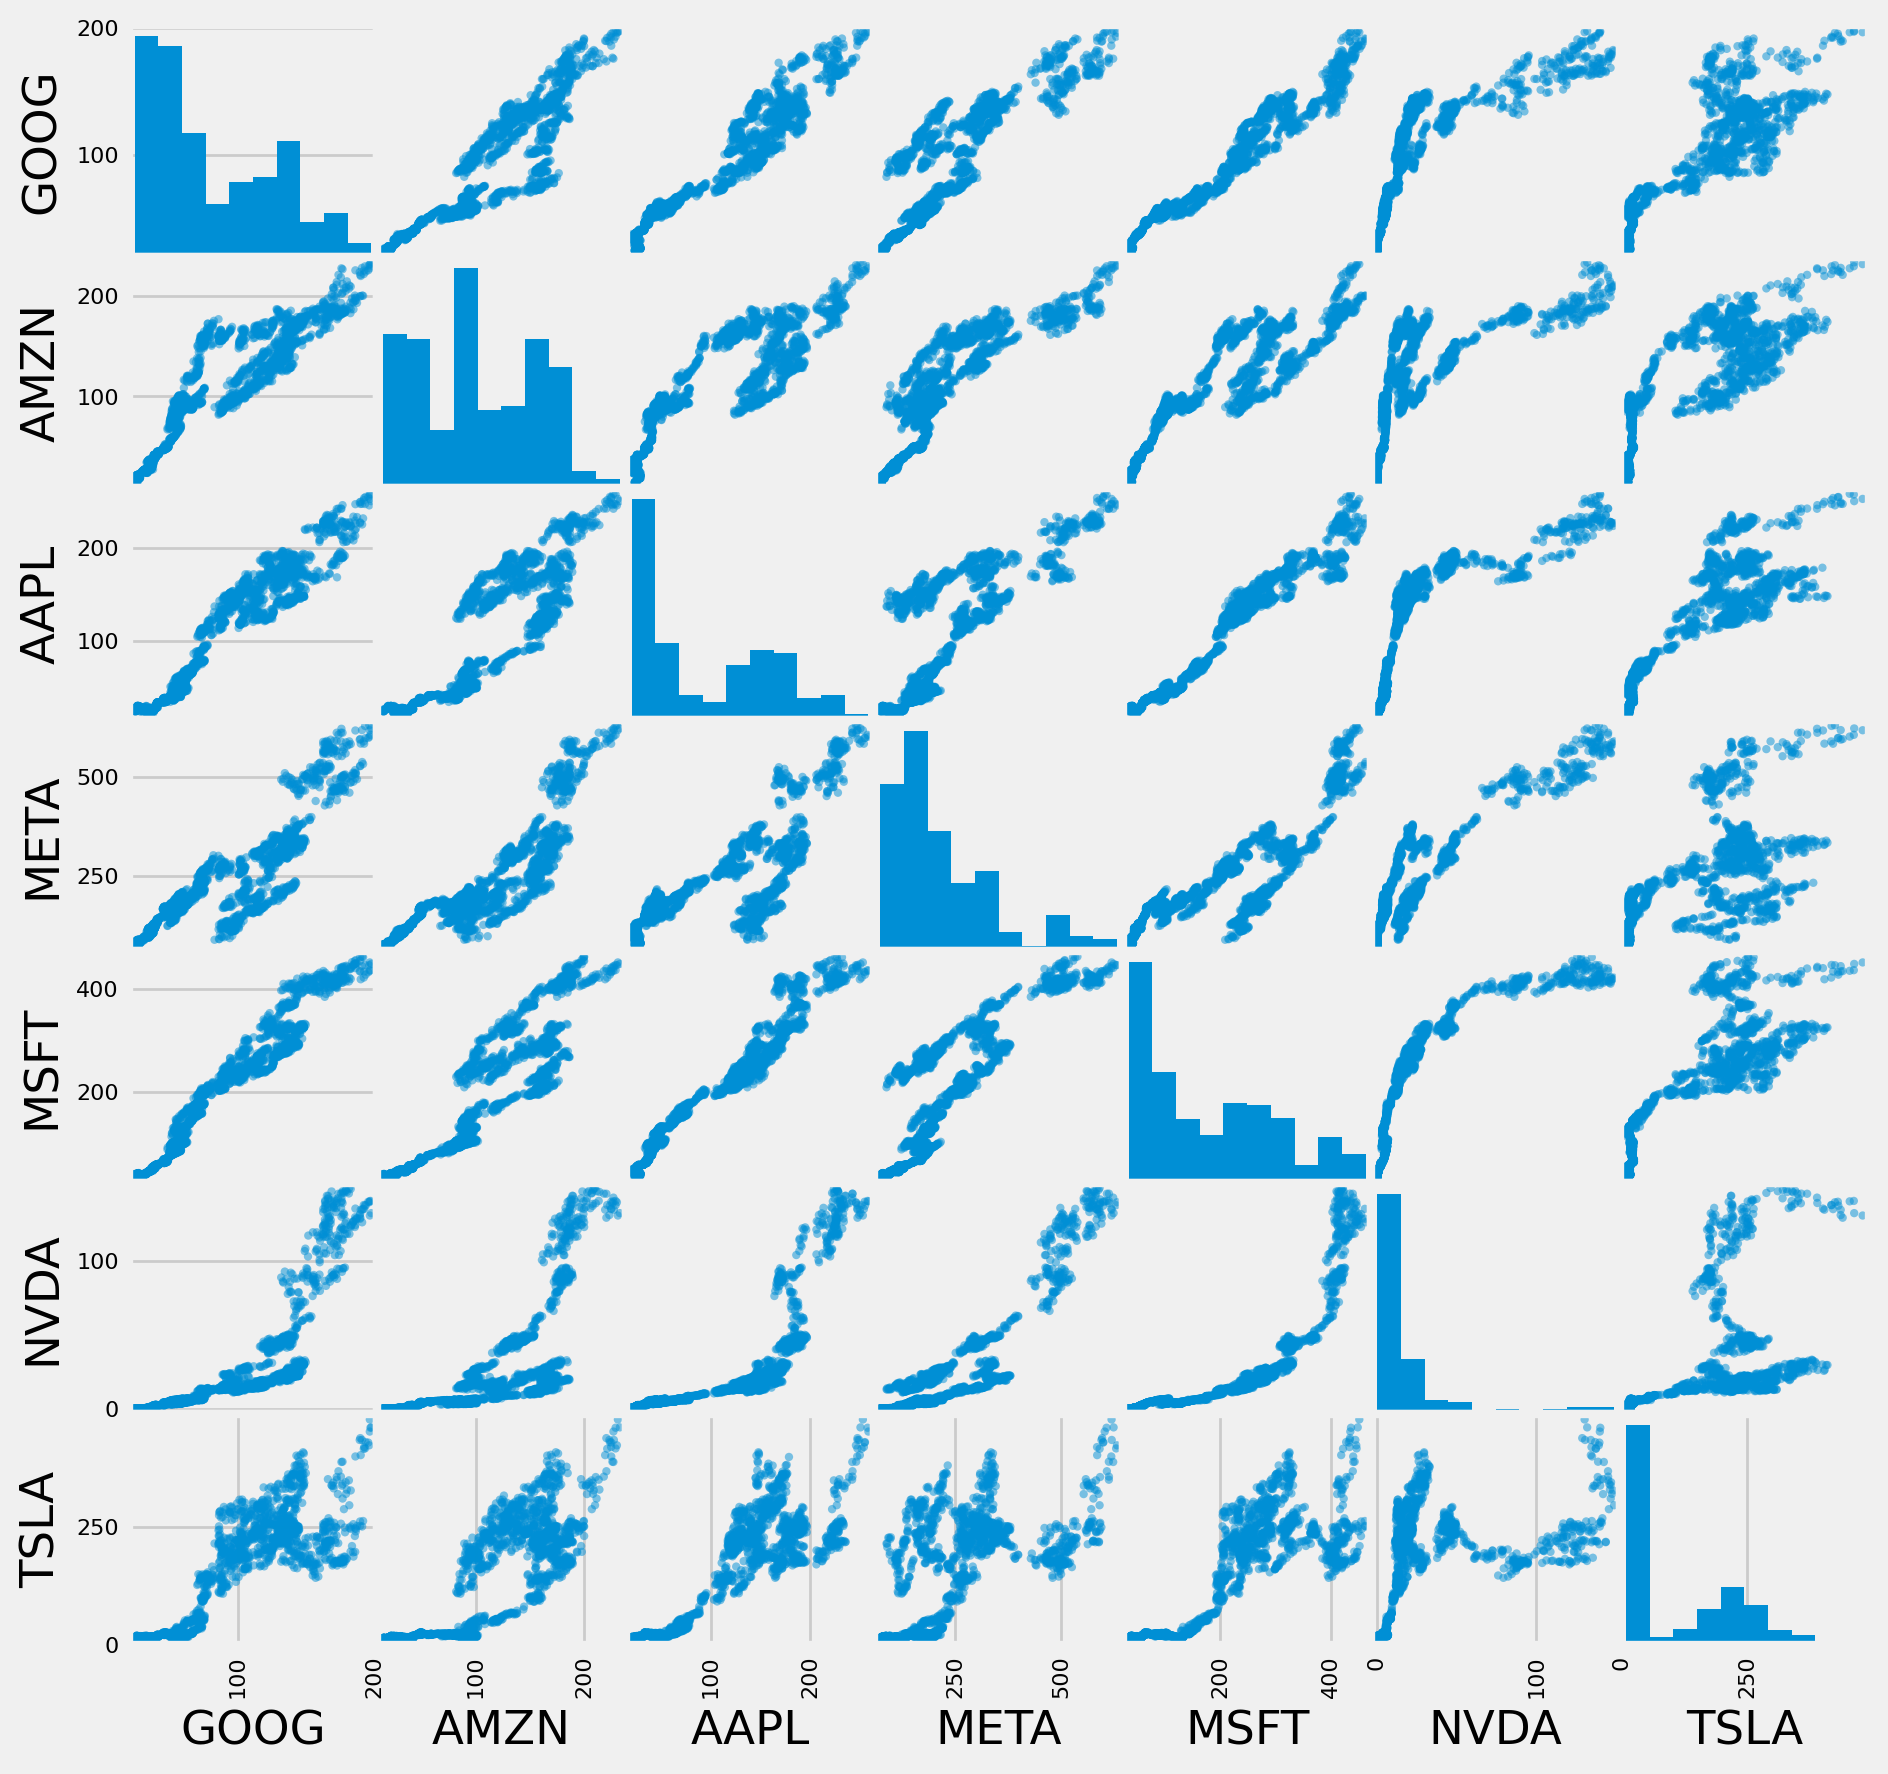

In [26]:
#dataset.hist(figsize=(10,10))
pd.plotting.scatter_matrix(dataset[['GOOG','AMZN','AAPL','META','MSFT','NVDA','TSLA']], figsize=(10,10))
plt.show()

> Most of these stock market distributions exhibit a skewed pattern, indicating potential outliers or extreme values in the data.

# Visualization of Closing Prices

In [27]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D","#93D30C","#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 18, 10
RANDOM_SEED = 42 # I'm seeding with 42, if you try the same you will get the same results.
np.random.seed(RANDOM_SEED)

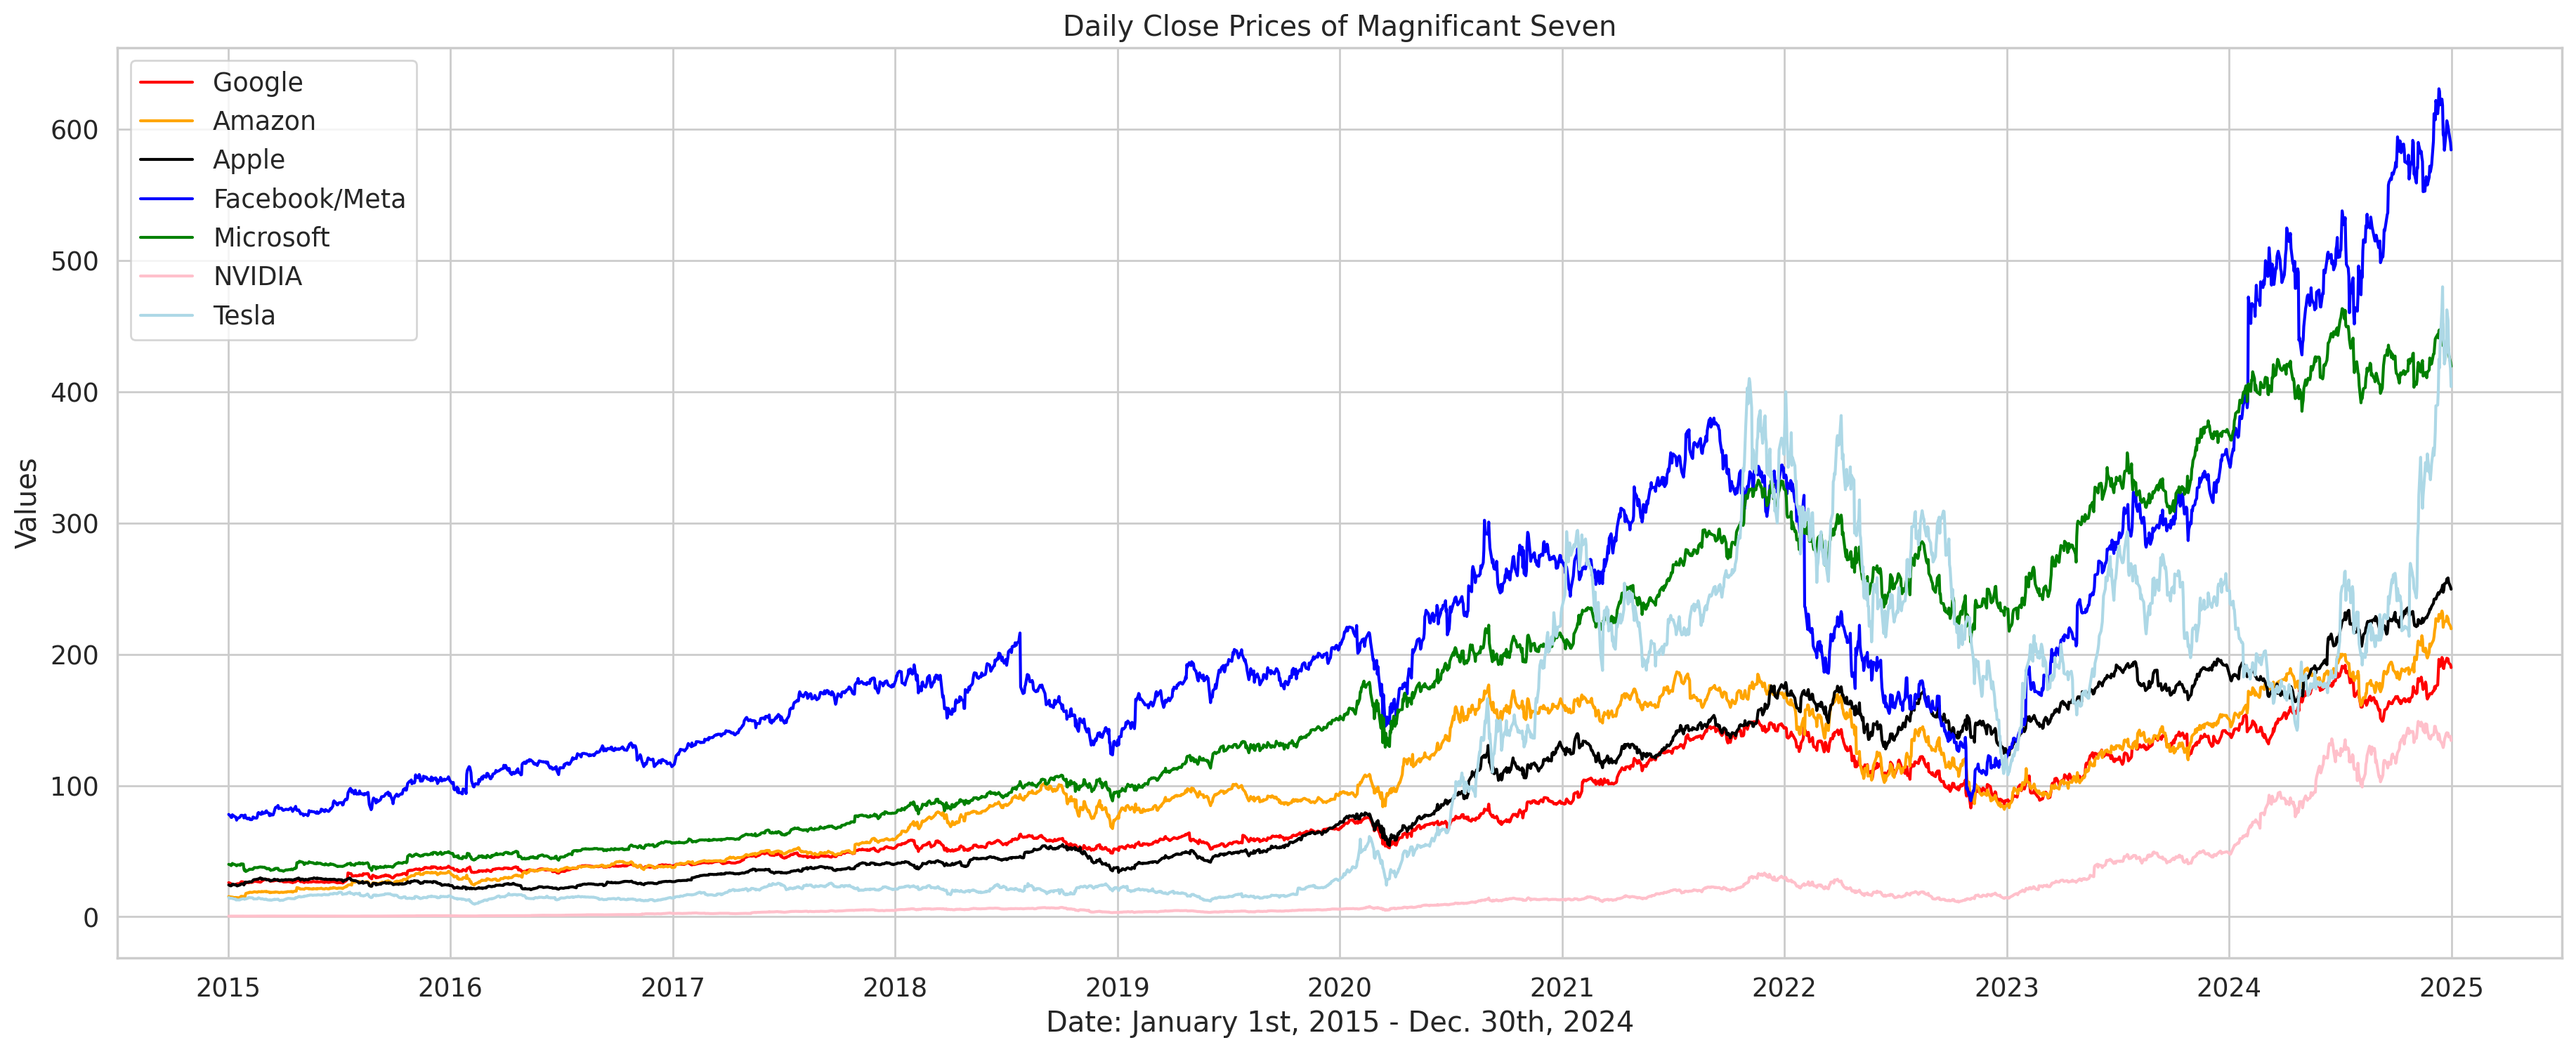

In [28]:
plt.figure(figsize=(20,8)) # Increases the Plot Size
plt.grid(True)
plt.title('Daily Close Prices of Magnificant Seven')
plt.xlabel('Date: January 1st, 2015 - Dec. 30th, 2024')
plt.ylabel('Values')
plt.plot(dataset['GOOG'], 'red', label='Google')
plt.plot(dataset['AMZN'], 'orange', label='Amazon')
plt.plot(dataset['AAPL'], 'black', label='Apple')
plt.plot(dataset['META'], 'blue', label='Facebook/Meta')
plt.plot(dataset['MSFT'], 'green', label='Microsoft')
plt.plot(dataset['NVDA'], 'pink', label='NVIDIA')
plt.plot(dataset['TSLA'], 'lightblue', label='Tesla')
plt.legend()
plt.show()

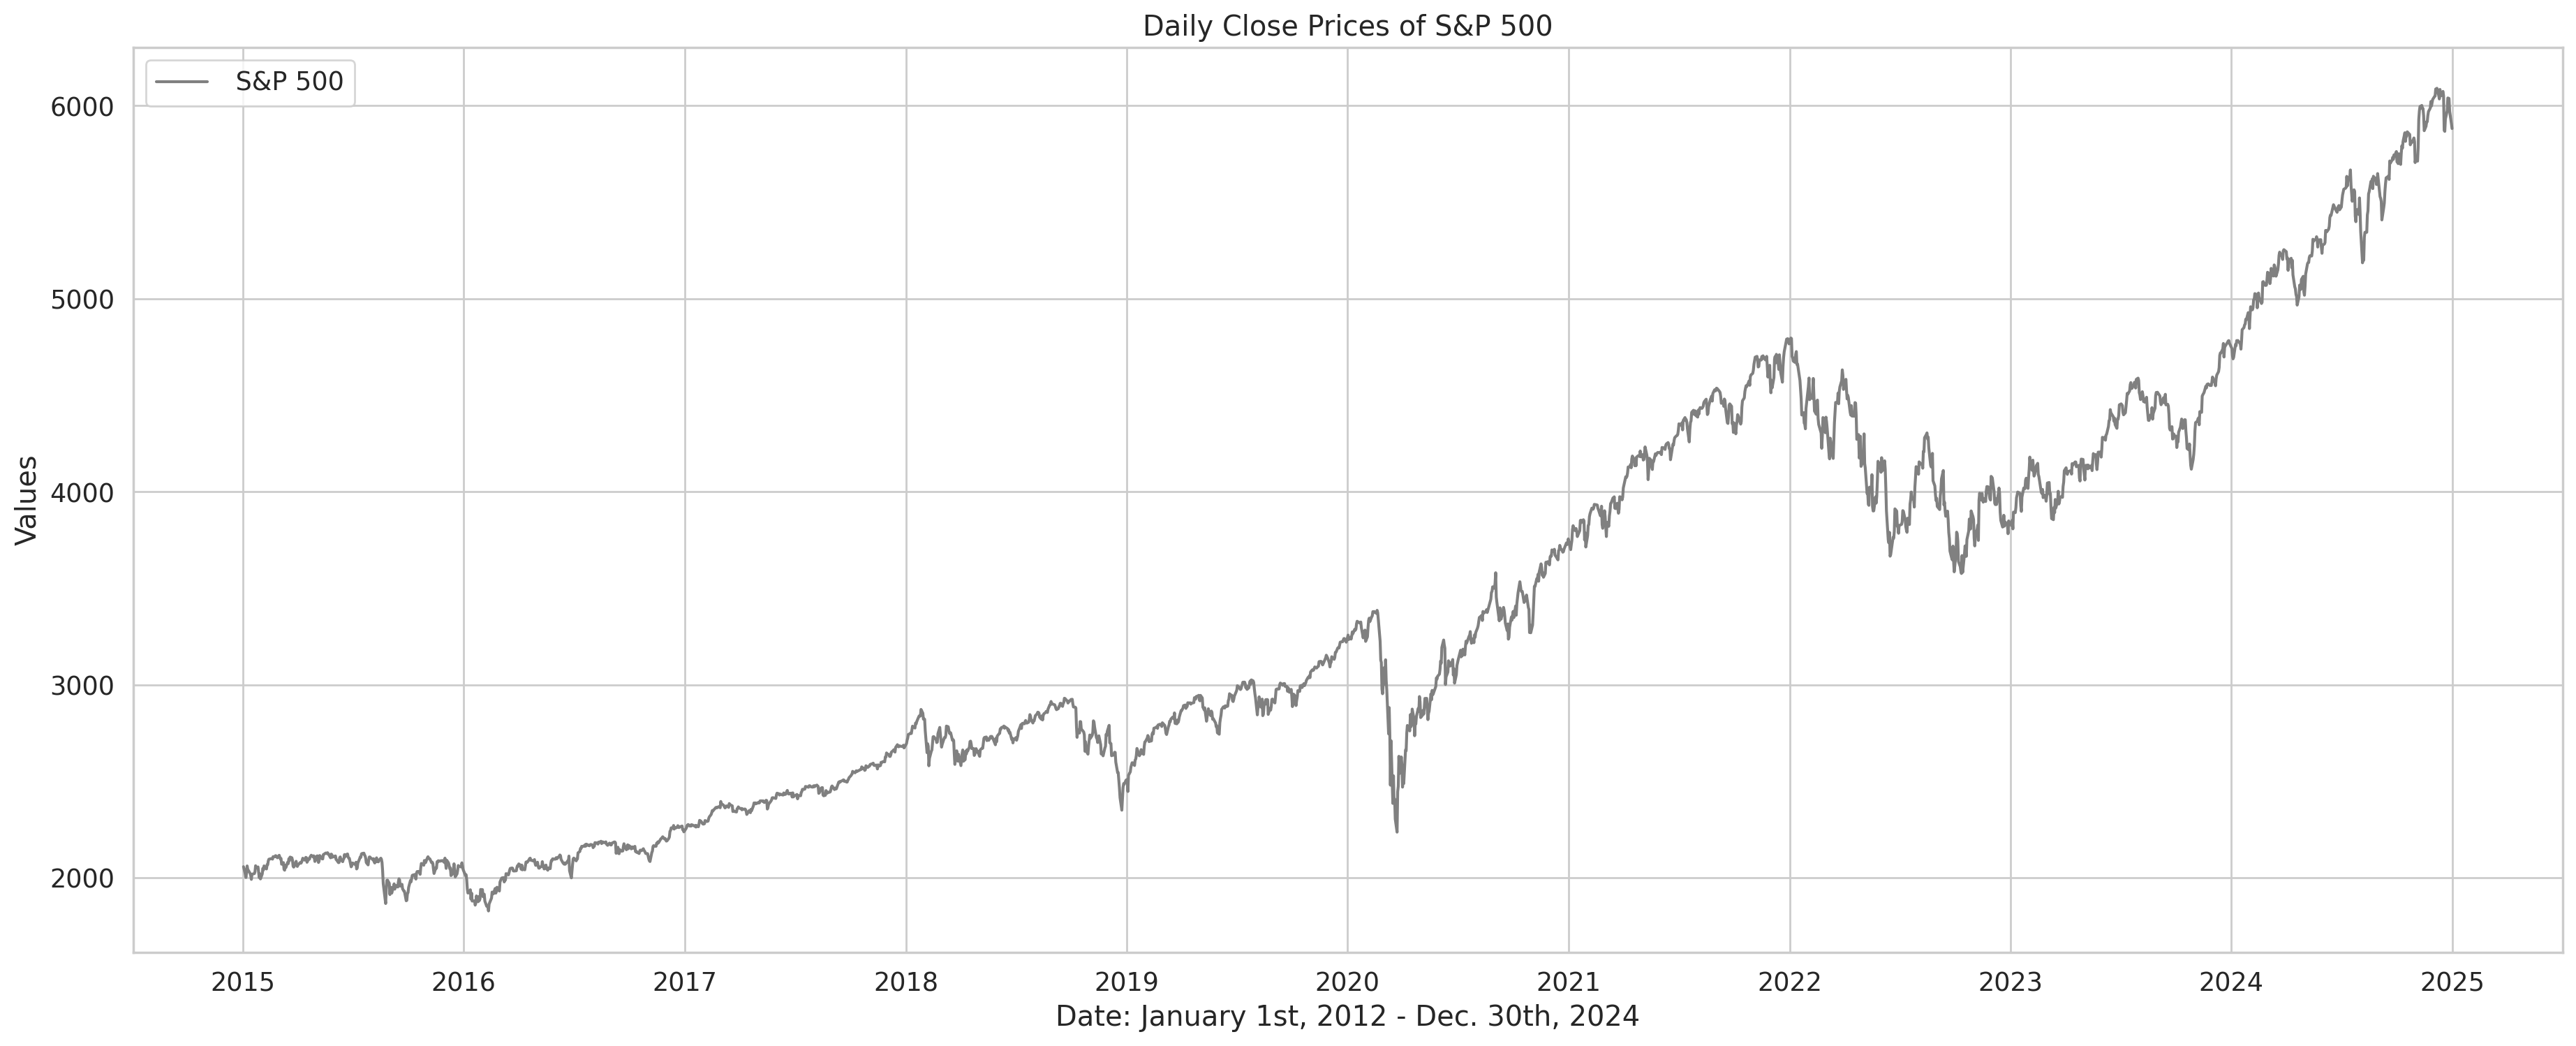

In [29]:
plt.figure(figsize=(20,8)) # Increases the Plot Size
plt.grid(True)
plt.title('Daily Close Prices of S&P 500')
plt.xlabel('Date: January 1st, 2012 - Dec. 30th, 2024')
plt.ylabel('Values')
plt.plot(dataset['GSPC'], 'grey', label=' S&P 500')
plt.legend()
plt.show()

The stock prices of Magnificent Seven companies (Google, Amazon, Apple, Facebook/Meta, Microsoft, NVIDIA and Tesla) increased until the COVID-19 crisis in early 2020, followed by a recovery and subsequent fluctuations. Notably, Facebook and Tesla experienced a significant drop in their stock prices during this period.

# Standard Risk Measure: Volatility (Returns)

Volatility is a standard risk measure that assesses the price fluctuations and stability of financial assets. The stock prices of Magnificent Seven companies (Google, Amazon, Apple, Facebook/Meta, Microsoft, NVIDIA and Tesla) are known for their dynamic and often volatile nature, driven by rapid technological advancements and market disruptions. This higher volatility reflects the risks associated with investing in these companies. On the other hand, the S&P 500, a broad market index representing 500 large-cap US companies, generally experiences lower volatility due to its diversified nature. However, during periods of market turbulence, the S&P 500 can also exhibit increased volatility. Understanding and considering volatility is crucial for investors to evaluate risk and make informed investment decisions. [This paper offers more insightful dynamics of S&P500 portfolios.](https://openaccess.city.ac.uk/id/eprint/33733/1/Risk_Parity_APTZ_CRO_2.pdf)

The formula for Simple Return is a basic calculation that measures the percentage change in the value of an investment over a given period.

**Simple Return**
$$r_t=\frac{P_t-P_{t-1}}{P_{t-1}}$$

In [30]:
#Create a new columns Return in the dataset for each company's
dataset['R_GOOG'] = dataset[['GOOG']].pct_change(1)
dataset['R_AMZN'] = dataset[['AMZN']].pct_change(1)
dataset['R_AAPL'] = dataset[['AAPL']].pct_change(1)
dataset['R_META'] = dataset[['META']].pct_change(1)
dataset['R_MSFT'] = dataset[['MSFT']].pct_change(1)
dataset['R_NVDA'] = dataset[['NVDA']].pct_change(1)
dataset['R_TSLA'] = dataset[['TSLA']].pct_change(1)
dataset['R_GSPC'] = dataset[['GSPC']].pct_change(1)
dataset.head

<bound method NDFrame.head of                   GOOG        AMZN        AAPL        META        MSFT  \
Date                                                                     
2015-01-02   25.990791   15.426000   24.261042   77.969345   39.933044   
2015-01-05   25.448999   15.109500   23.577572   76.717064   39.565845   
2015-01-06   24.859163   14.764500   23.579792   75.683426   38.985111   
2015-01-07   24.816574   14.921000   23.910431   75.683426   39.480427   
2015-01-08   24.894821   15.023000   24.829136   77.700996   40.641865   
...                ...         ...         ...         ...         ...   
2024-12-24  196.932251  229.050003  257.286682  606.333679  436.929108   
2024-12-26  196.463760  227.050003  258.103729  601.943970  435.715790   
2024-12-27  193.413620  223.750000  254.685883  598.412170  428.177216   
2024-12-30  192.067978  221.300003  251.307861  589.862122  422.508362   
2024-12-31  189.825256  219.389999  249.534164  584.145508  419.196564   

                  NVDA        TSLA         GSPC    R_GOOG    R_AMZN    R_AAPL  \
Date                                                                            
2015-01-02    0.483038   14.620667  2058.199951       NaN       NaN       NaN   
2015-01-05    0.474880   14.006000  2020.579956 -0.020846 -0.020517 -0.028171   
2015-01-06    0.460482   14.085333  2002.609985 -0.023177 -0.022833  0.000094   
2015-01-07    0.459282   14.063333  2025.900024 -0.001713  0.010600  0.014022   
2015-01-08    0.476559   14.041333  2062.139893  0.003153  0.006836  0.038423   
...                ...         ...          ...       ...       ...       ...   
2024-12-24  140.189468  462.279999  6040.040039  0.008062  0.017729  0.011478   
2024-12-26  139.899521  454.130005  6037.589844 -0.002379 -0.008732  0.003176   
2024-12-27  136.980164  431.660004  5970.839844 -0.015525 -0.014534 -0.013242   
2024-12-30  137.460052  417.410004  5906.939941 -0.006957 -0.010950 -0.013263   
2024-12-31  134.260757  403.839996  5881.629883 -0.011677 -0.008631 -0.007058   

              R_META    R_MSFT    R_NVDA    R_TSLA    R_GSPC  
Date                                                          
2015-01-02       NaN       NaN       NaN       NaN       NaN  
2015-01-05 -0.016061 -0.009195 -0.016891 -0.042041 -0.018278  
2015-01-06 -0.013473 -0.014678 -0.030318  0.005664 -0.008893  
2015-01-07  0.000000  0.012705 -0.002606 -0.001562  0.011630  
2015-01-08  0.026658  0.029418  0.037617 -0.001564  0.017888  
...              ...       ...       ...       ...       ...  
2024-12-24  0.013170  0.009374  0.003938  0.073572  0.011043  
2024-12-26 -0.007240 -0.002777 -0.002068 -0.017630 -0.000406  
2024-12-27 -0.005867 -0.017302 -0.020868 -0.049479 -0.011056  
2024-12-30 -0.014288 -0.013240  0.003503 -0.033012 -0.010702  
2024-12-31 -0.009691 -0.007838 -0.023274 -0.032510 -0.004285  

[2516 rows x 16 columns]>

In [31]:
dataset.describe()

GOOG         AMZN         AAPL         META         MSFT  \
count  2516.000000  2516.000000  2516.000000  2516.000000  2516.000000   
mean     82.249411   101.233089    93.949921   220.982813   181.012797   
std      44.290227    54.173887    65.504728   121.199531   123.188360   
min      24.393141    14.347500    20.624052    73.596313    34.501614   
25%      46.159986    48.397126    35.257081   135.566769    64.823776   
50%      64.243118    94.572502    64.450432   181.968216   146.155914   
75%     120.171135   153.856247   150.379658   279.151611   275.278847   
max     197.520325   232.929993   258.103729   630.696838   463.240967   

              NVDA         TSLA         GSPC       R_GOOG       R_AMZN  \
count  2516.000000  2516.000000  2516.000000  2515.000000  2515.000000   
mean     20.785709   115.679423  3356.124980     0.000952     0.001268   
std      32.312595   114.226440  1083.898653     0.017954     0.020650   
min       0.459282     9.578000  1829.079956    -0.111008    -0.140494   
25%       3.544837    17.185167  2432.287476    -0.007192    -0.008636   
50%       6.482235    28.505667  3004.994995     0.001180     0.001143   
75%      21.227504   220.205002  4204.595093     0.009463     0.011307   
max     148.837341   479.859985  6090.270020     0.160524     0.141311   

            R_AAPL       R_META       R_MSFT       R_NVDA       R_TSLA  \
count  2515.000000  2515.000000  2515.000000  2515.000000  2515.000000   
mean      0.001088     0.001083     0.001081     0.002704     0.001966   
std       0.017929     0.023617     0.017096     0.030620     0.036009   
min      -0.128647    -0.263901    -0.147390    -0.187559    -0.210628   
25%      -0.007326    -0.009139    -0.006736    -0.012487    -0.016168   
50%       0.001001     0.000981     0.000958     0.002643     0.001262   
75%       0.010142     0.012217     0.009768     0.017616     0.019255   
max       0.119809     0.232824     0.142169     0.298067     0.219190   

            R_GSPC  
count  2515.000000  
mean      0.000481  
std       0.011230  
min      -0.119841  
25%      -0.003776  
50%       0.000636  
75%       0.005755  
max       0.093828

In [32]:
# Daily volatility (in %) of each stock
dataset[['R_GOOG','R_AMZN','R_AAPL','R_META','R_MSFT','R_NVDA','R_TSLA', 'R_GSPC']].std()

R_GOOG    0.017954
R_AMZN    0.020650
R_AAPL    0.017929
R_META    0.023617
R_MSFT    0.017096
R_NVDA    0.030620
R_TSLA    0.036009
R_GSPC    0.011230
dtype: float64

 > The descriptive statistics table provides valuable insights into the risk levels of each stock, as represented by their standard deviations. Among the stocks analysed, Tesla exhibits the highest level of risk with a standard deviation of $3.69\%$, indicating relatively more significant price fluctuations and potential volatility. Following Tesla, NVIDIA shows a lower but still significant level of risk with a standard deviation of $3.06\%$.

 > Comparatively, the risk associated with the S&P 500 market is relatively lower, as indicated by its standard deviation of $1.123\%$. This suggests that, on average, all of these individual stocks carry higher risks than the overall market represented by the S&P 500. These findings highlight the importance of considering risk factors when making investment decisions. Investors may opt to allocate their portfolio based on their risk appetite, taking into account the higher risk associated with specific stocks such as Tesla and NVIDIA compared to the broader market.

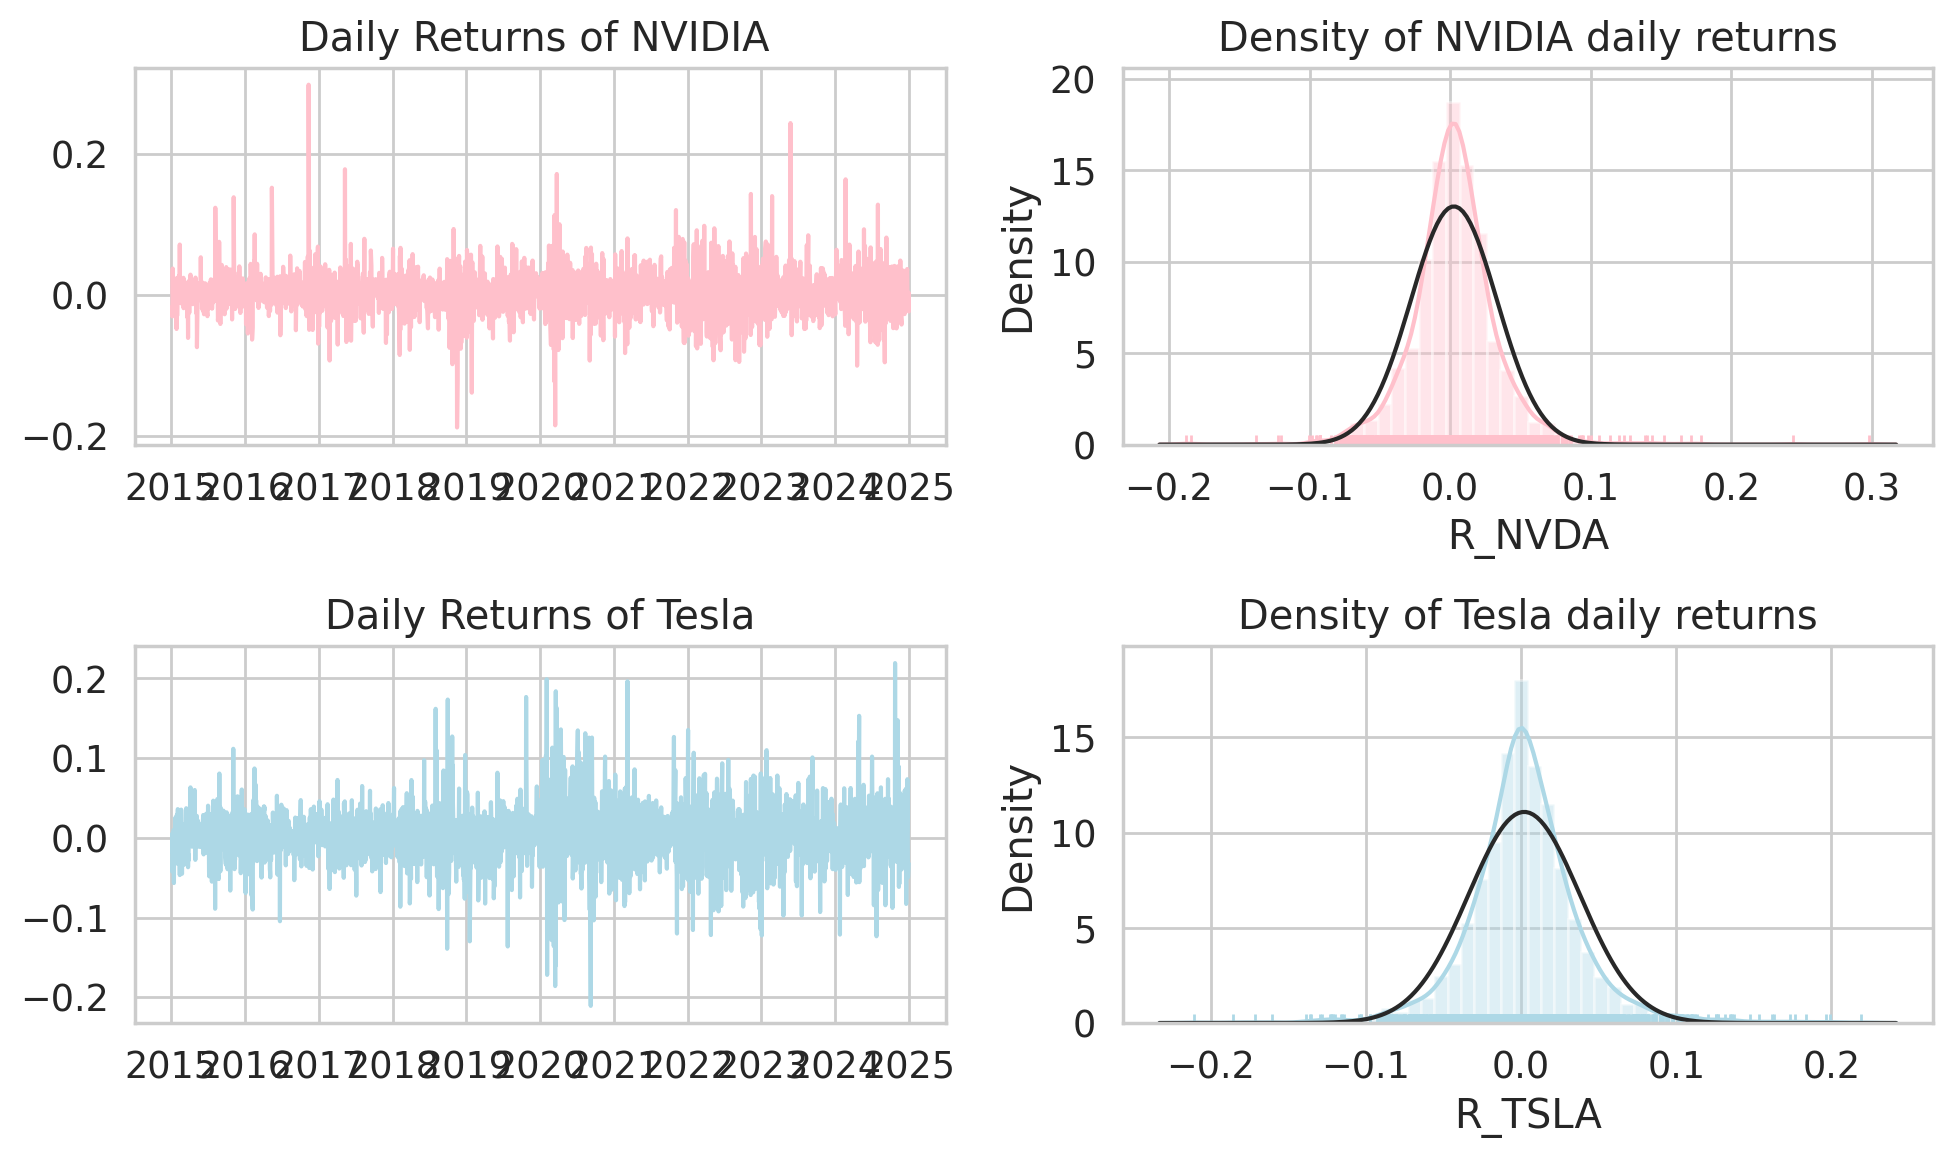

In [33]:
from scipy import stats
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))

    axes[0][0].plot(dataset['R_NVDA'], color='pink')
    axes[0][0].set_title('Daily Returns of NVIDIA ')

    sns.distplot(dataset['R_NVDA'], fit=stats.norm, color='pink', bins=50, ax=axes[0][1], kde=True, rug=True, hist=True)
    axes[0][1].set_title('Density of NVIDIA daily returns')

    axes[1][0].plot(dataset['R_TSLA'], color='lightblue')
    axes[1][0].set_title('Daily Returns of Tesla')

    sns.distplot(dataset['R_TSLA'], fit=stats.norm, color='lightblue', bins=50, ax=axes[1][1], kde=True, rug=True, hist=True)
    axes[1][1].set_title('Density of Tesla daily returns')
    plt.tight_layout()
    #fig.show()
    plt.show()

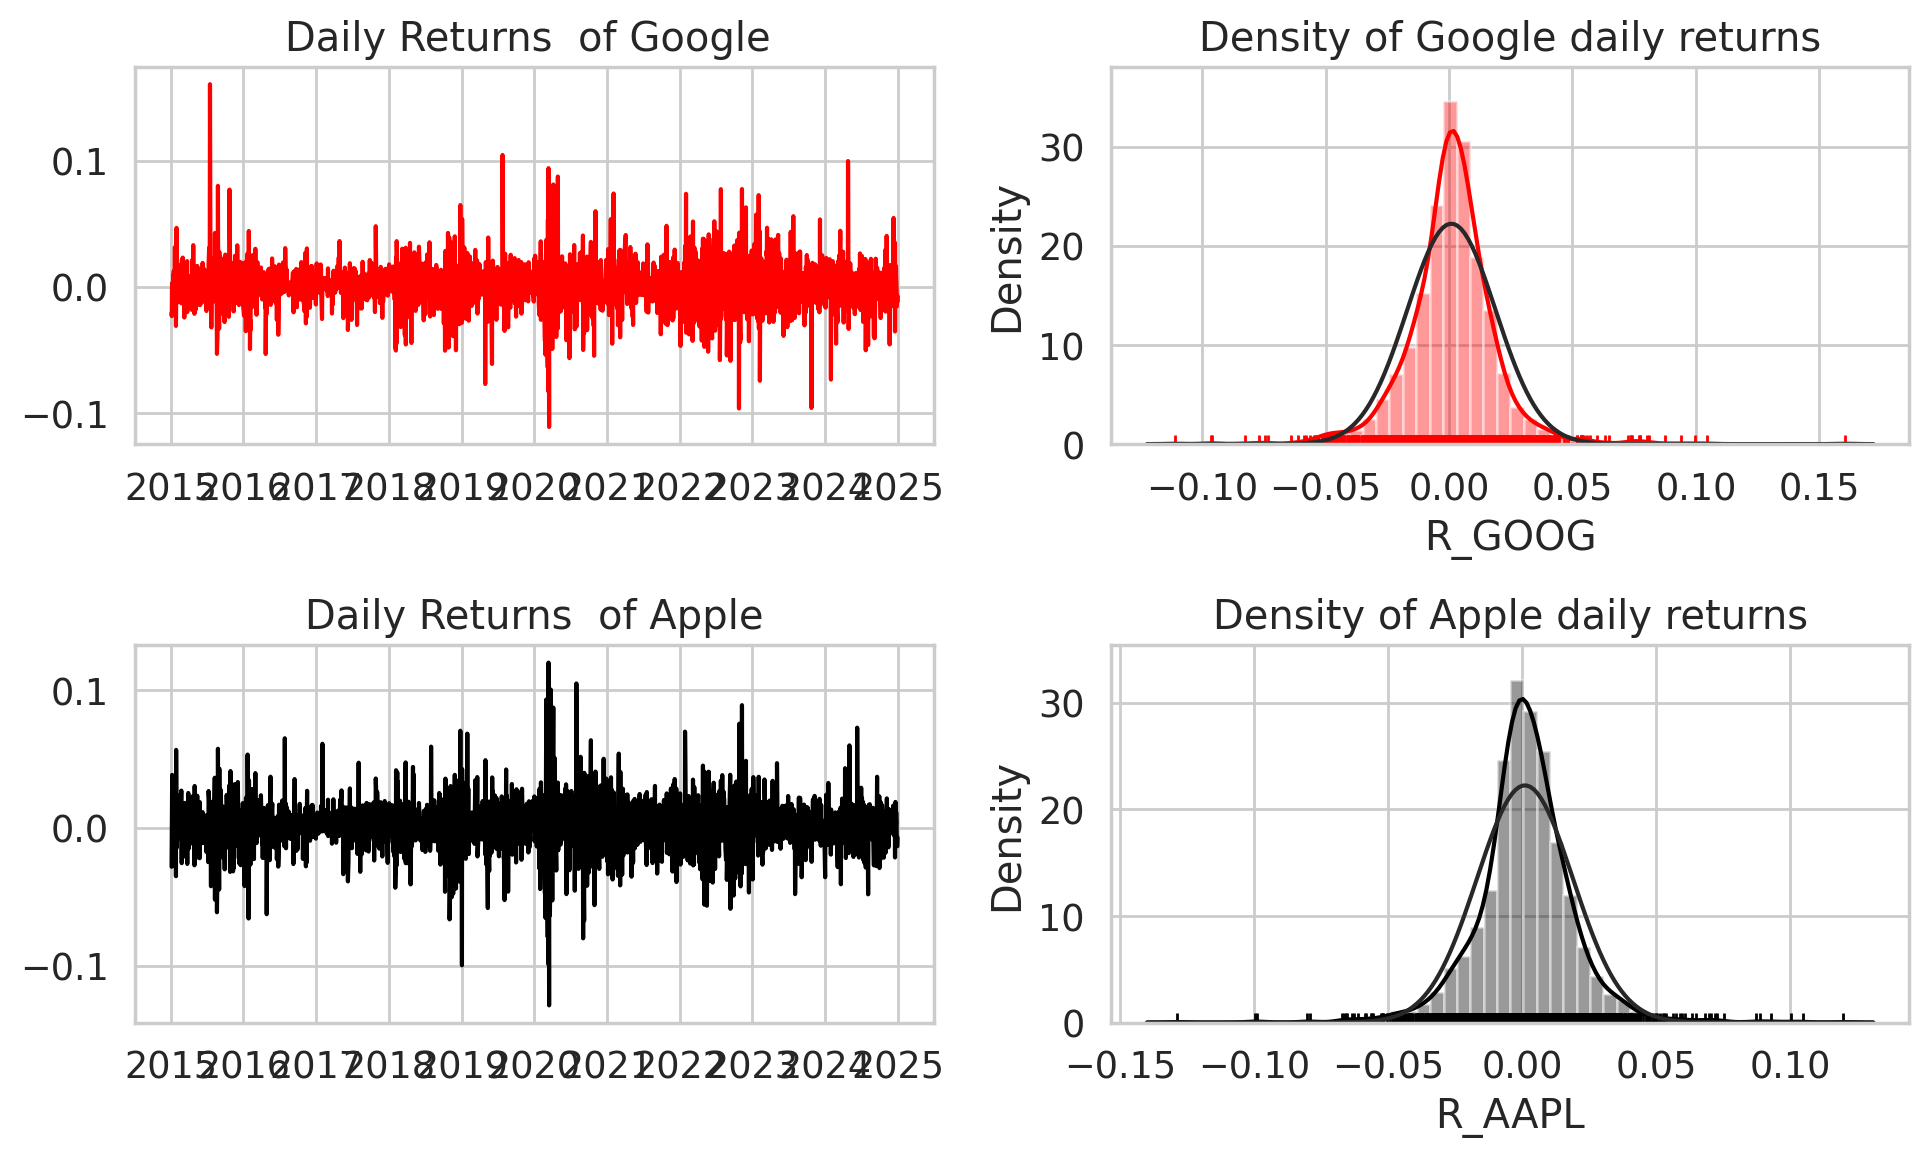

In [34]:
from scipy import stats
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))

    axes[0][0].plot(dataset['R_GOOG'], color='red')
    axes[0][0].set_title('Daily Returns  of Google ')

    sns.distplot(dataset['R_GOOG'], fit=stats.norm, color='red', bins=50, ax=axes[0][1], kde=True, rug=True, hist=True)
    axes[0][1].set_title('Density of Google daily returns')

    axes[1][0].plot(dataset['R_AAPL'], color='black')
    axes[1][0].set_title('Daily Returns  of Apple')

    sns.distplot(dataset['R_AAPL'], fit=stats.norm, color='black',bins=50, ax=axes[1][1], kde=True, rug=True, hist=True)
    axes[1][1].set_title('Density of Apple daily returns')
    plt.tight_layout()
    #fig.show()
    plt.show()

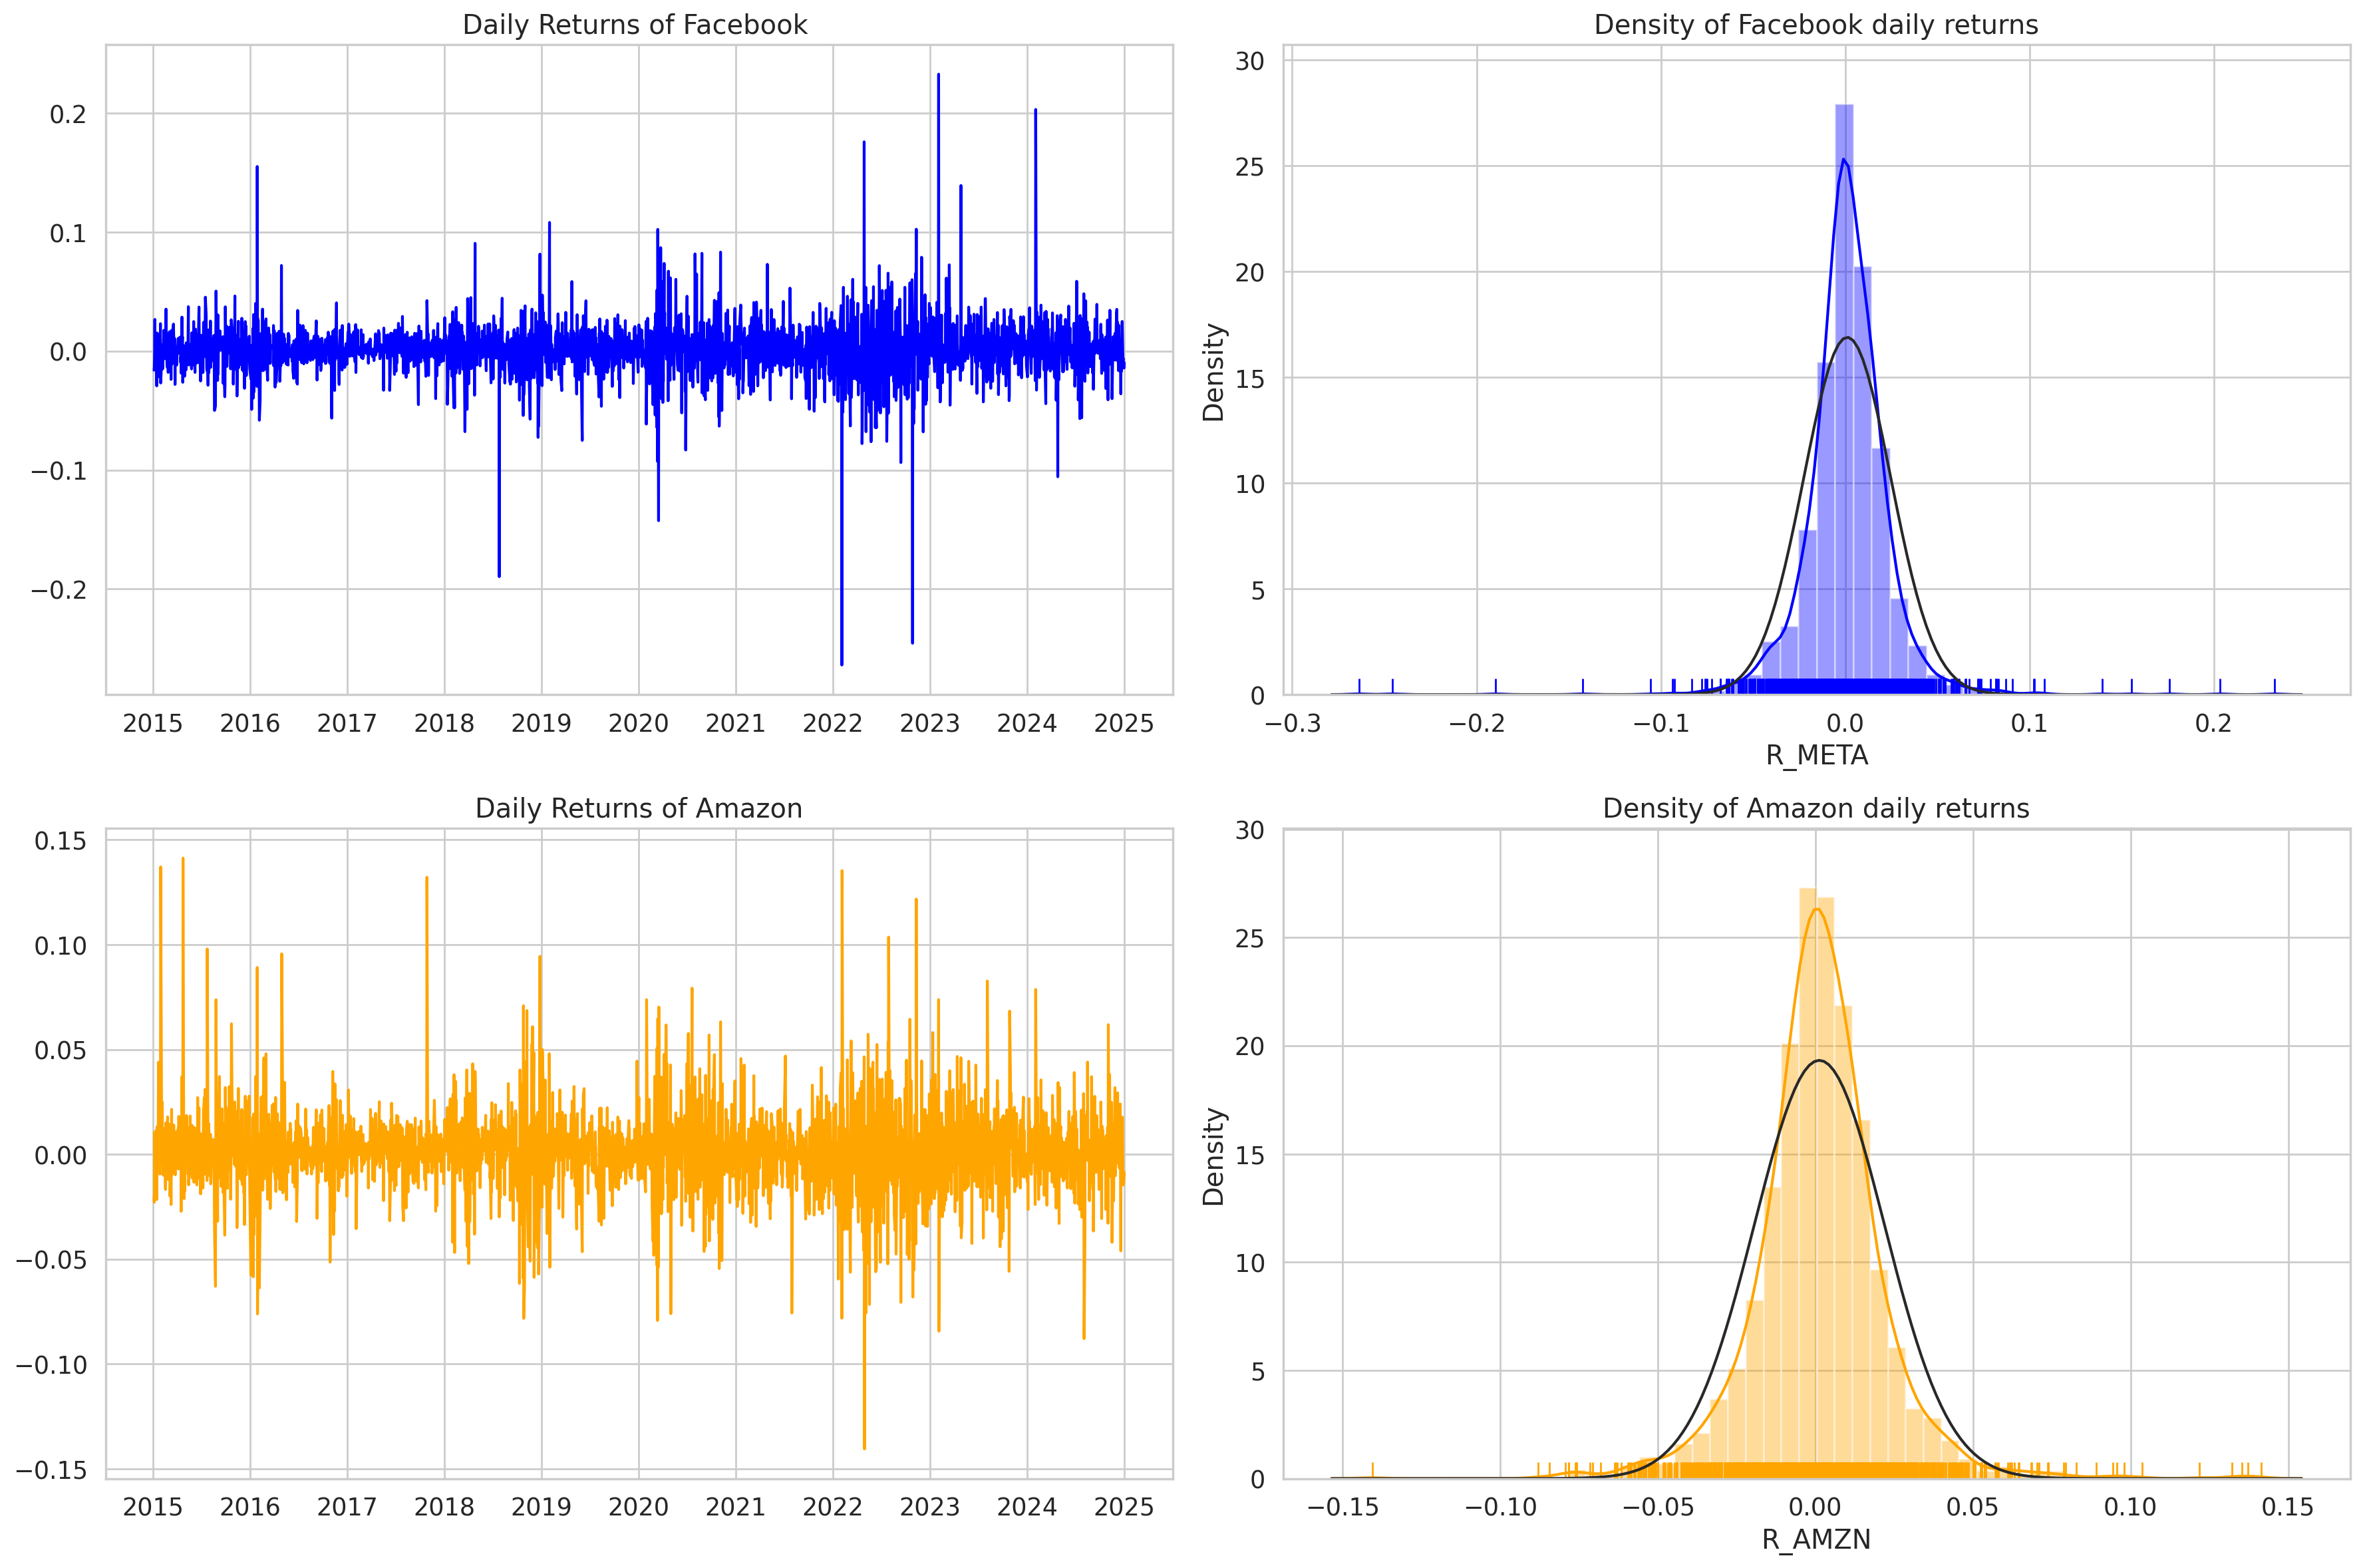

In [35]:
from scipy import stats
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,12))

    axes[0][0].plot(dataset['R_META'], color='blue')
    axes[0][0].set_title('Daily Returns of Facebook ')

    sns.distplot(dataset['R_META'], fit=stats.norm, color='blue', bins=50, ax=axes[0][1], kde=True, rug=True, hist=True)
    axes[0][1].set_title('Density of Facebook daily returns')

    axes[1][0].plot(dataset['R_AMZN'], color='orange')
    axes[1][0].set_title('Daily Returns of Amazon')

    sns.distplot(dataset['R_AMZN'], fit=stats.norm, color='orange', bins=50, ax=axes[1][1], kde=True, rug=True, hist=True)
    axes[1][1].set_title('Density of Amazon daily returns')
    plt.tight_layout()
    #fig.show();
    plt.show()

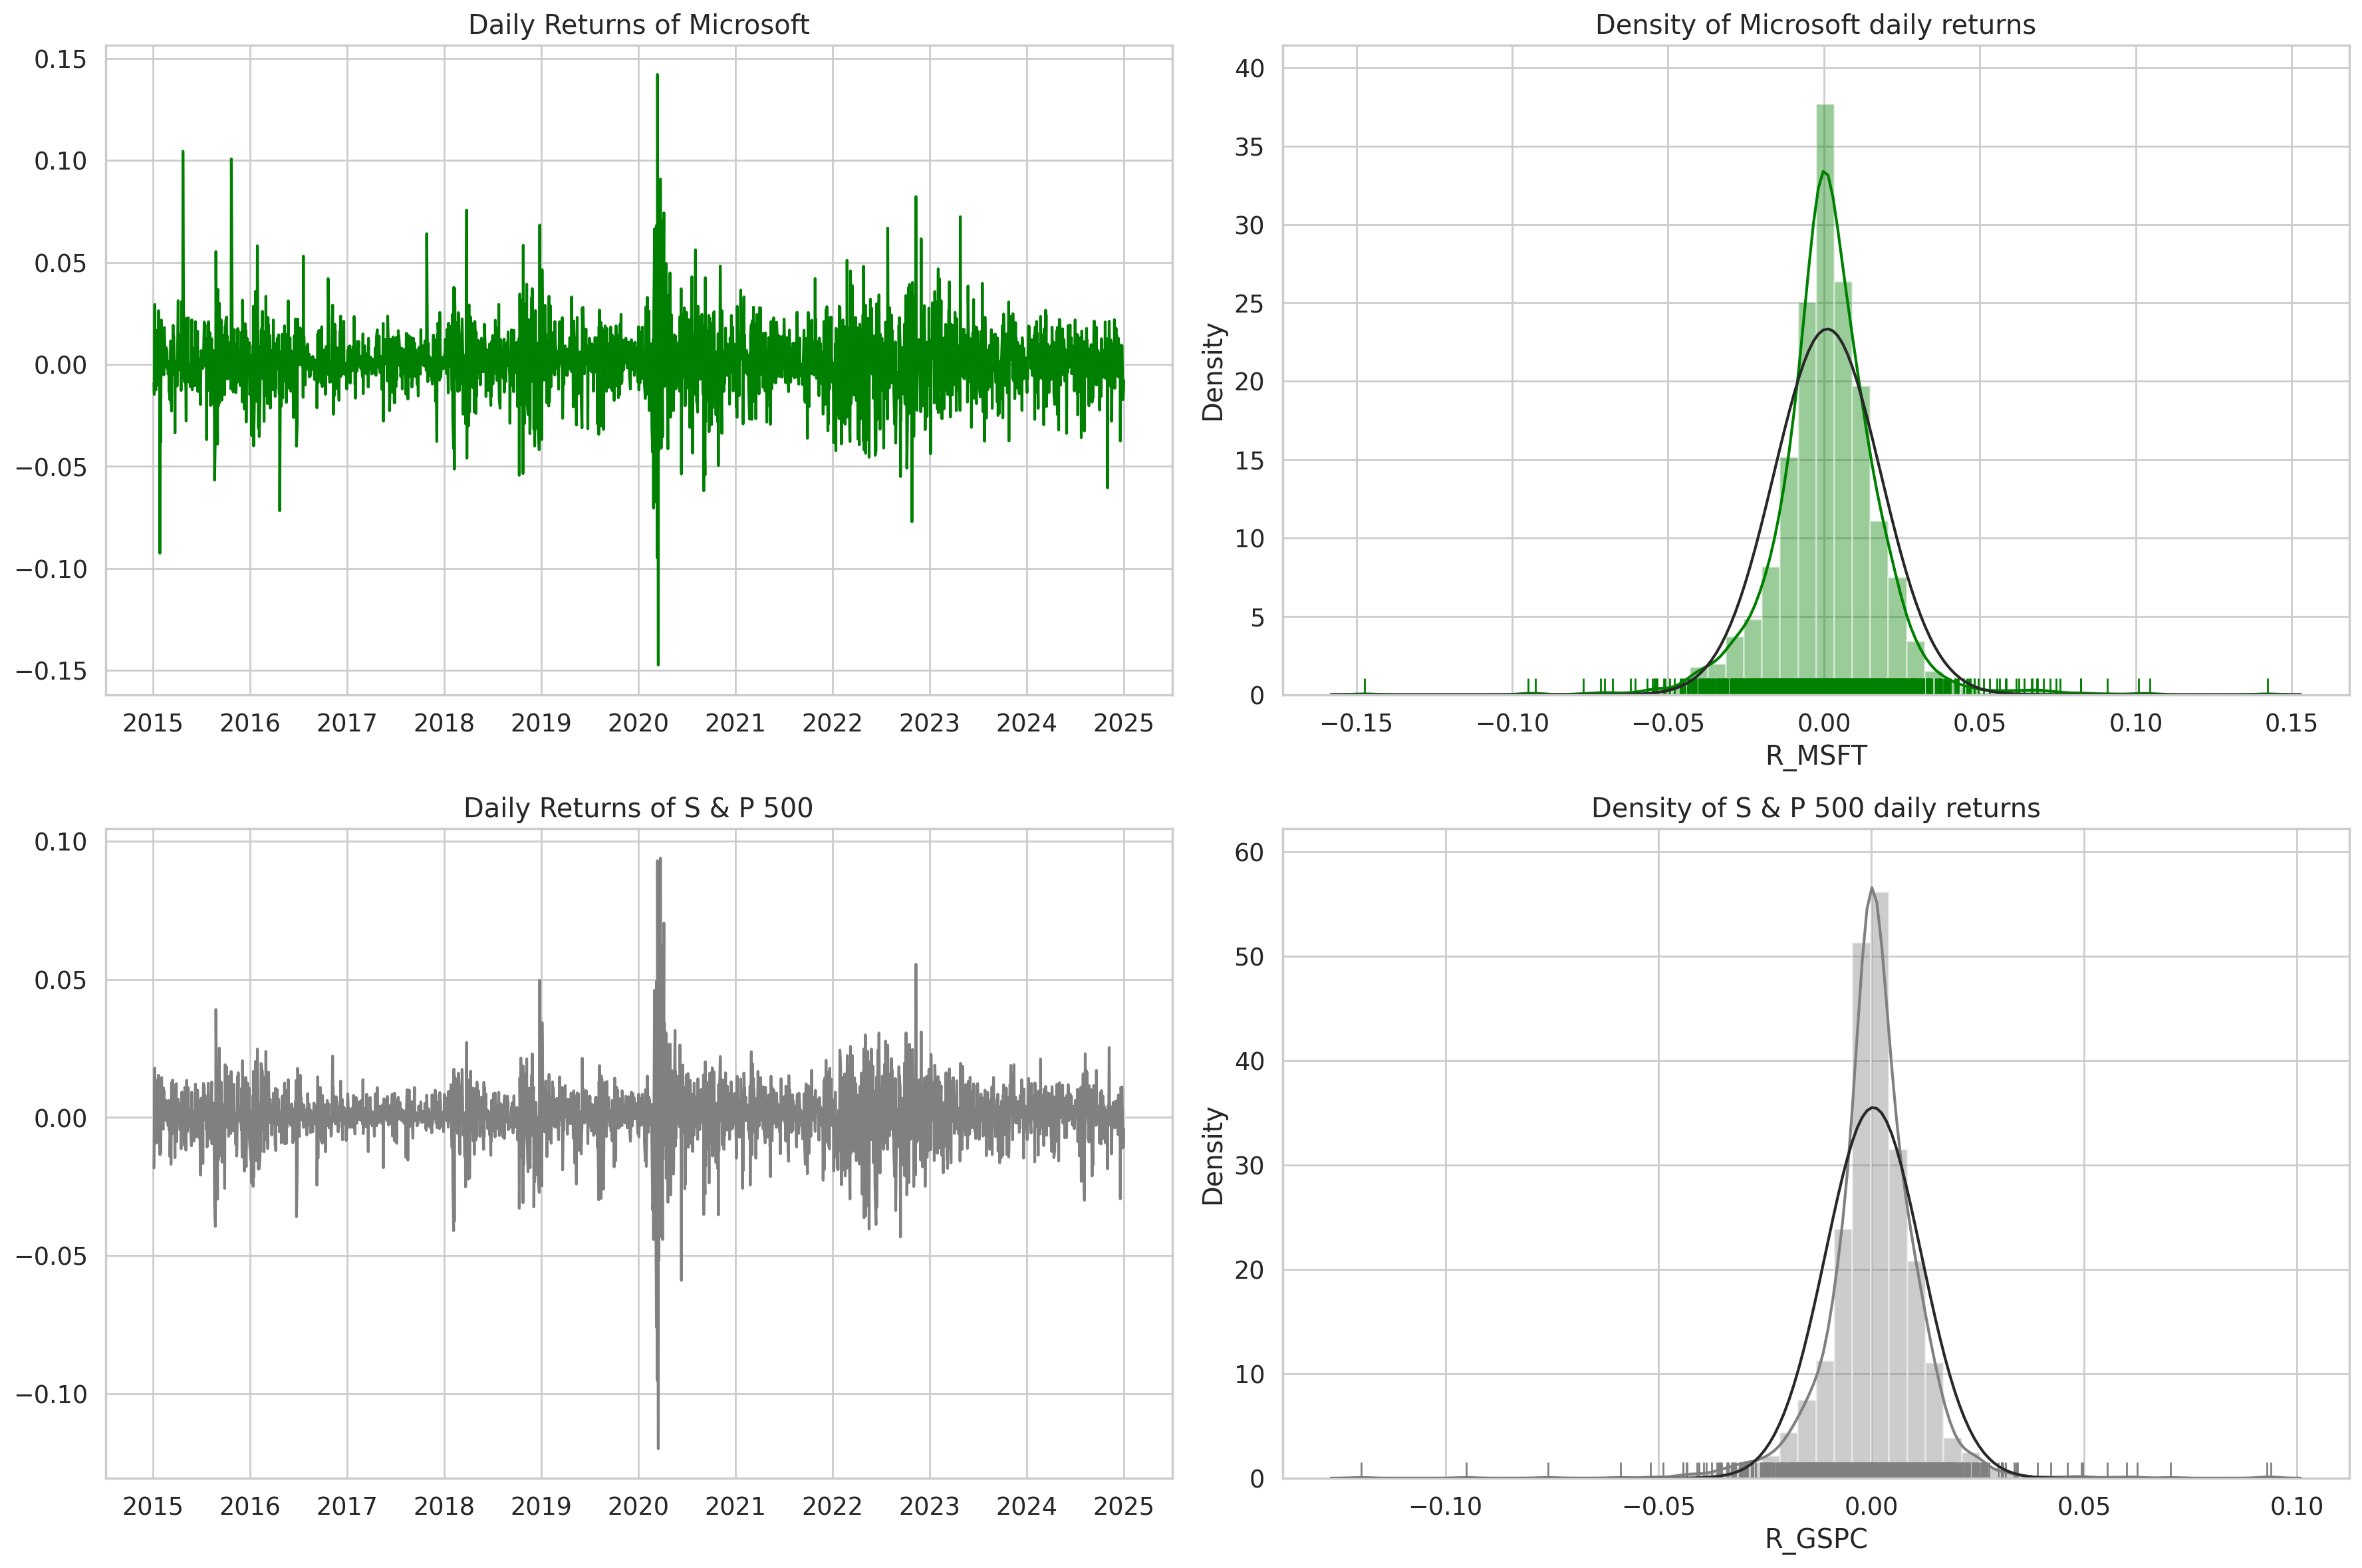

In [36]:
from scipy import stats
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,12))

    axes[0][0].plot(dataset['R_MSFT'], color='green')
    axes[0][0].set_title('Daily Returns of Microsoft')

    sns.distplot(dataset['R_MSFT'], fit=stats.norm, color='green', bins=50, ax=axes[0][1], kde=True, rug=True, hist=True)
    axes[0][1].set_title('Density of Microsoft daily returns')

    axes[1][0].plot(dataset['R_GSPC'], color='grey')
    axes[1][0].set_title('Daily Returns of S & P 500')

    sns.distplot(dataset['R_GSPC'], fit=stats.norm, color='grey', bins=50, ax=axes[1][1], kde=True, rug=True, hist=True)
    axes[1][1].set_title('Density of S & P 500 daily returns')
    plt.tight_layout()
    #fig.show();
    plt.show()
    fig.savefig('test1')

>  The return graphs indicate periods of high volatility in all of these stocks, and the S&P 500, particularly at the beginning of 2020 due to the COVID-19 crisis. During this time, the stock returns experienced significant fluctuations and increased volatility, reflecting the pandemic's market uncertainty and economic impact.

> Apart from these volatile periods, the density of returns for each company appears to be symmetric around the origin, suggesting a balanced distribution of positive and negative returns. Additionally, the returns of each company exhibit a pattern that closely follows a normal distribution. This implies on average, the returns of these stocks tend to cluster near the mean value, with fewer extreme outliers.

> Understanding the volatility and distribution of returns is crucial for investors as it provides insights into the potential risks and rewards associated with investing in these companies. It enables investors to evaluate historical performance and make informed decisions based on risk appetite and return expectations.

# Portfolio Optimization using Efficient Frontier

Portfolio Optimization using the Efficient Frontier is a powerful approach to construct an optimal investment portfolio by considering the stock prices of Magnificent Seven companies (Google, Amazon, Apple, Facebook/Meta, Microsoft, NVIDIA and Tesla) and the S&P 500. The Efficient Frontier is a graphical representation that illustrates the trade-off between risk and return for different portfolio allocations. By analyzing the historical data and expected returns of these stocks, along with their correlations, portfolio optimization techniques can help investors identify the optimal combination of assets that maximize returns for a given level of risk or minimize risk for a desired level of return. This approach allows investors to make well-informed decisions, diversify their investments, and potentially achieve higher returns while managing risk effectively in the context of these prominent tech companies and the broader market represented by the S&P 500.

## Correlation coefficients between companies' closing prices

The correlation coefficients between the close prices of these stocks, and the S&P 500 provide insights into the degree of linear relationship between the individual stock prices and the overall market. These coefficients quantify the strength and direction of the relationship, helping investors understand the level of synchronisation or divergence between these companies' stocks and the broader market.

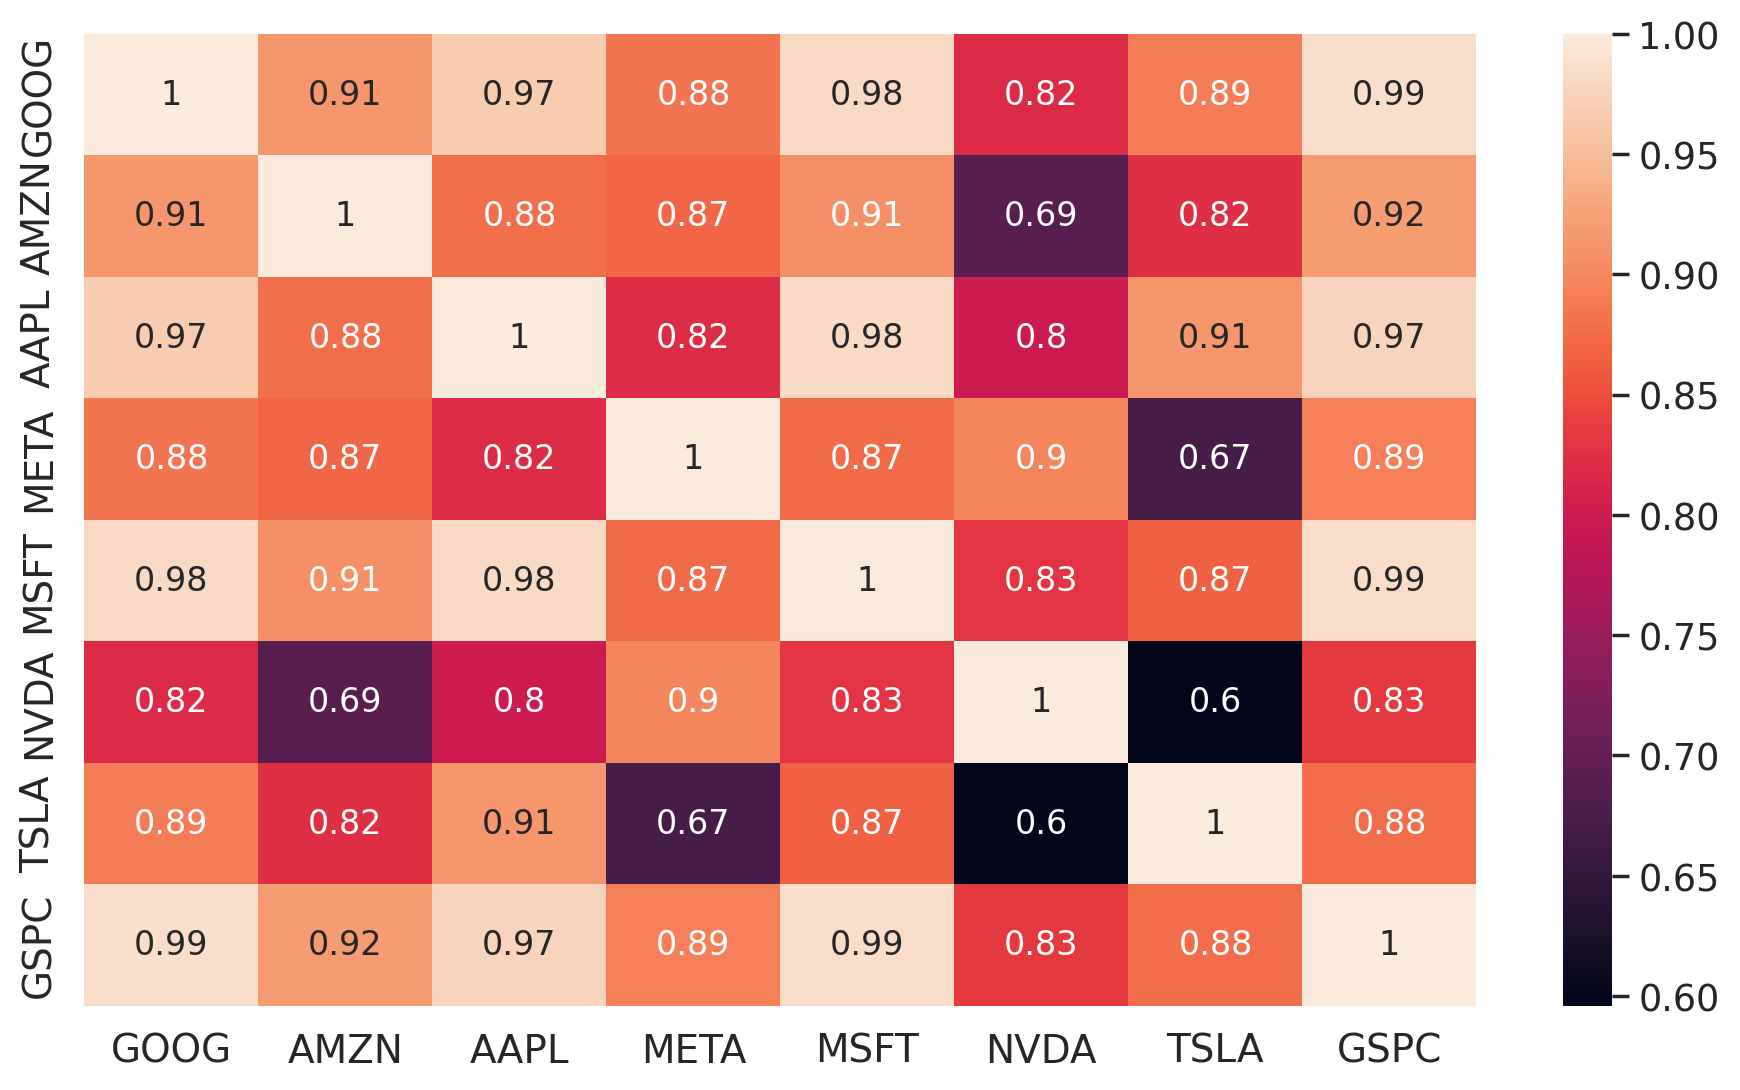

In [37]:
corr = dataset[['GOOG','AMZN','AAPL','META','MSFT','NVDA','TSLA', 'GSPC']].corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt. show()

> The correlation map of daily prices reveals strong positive correlations between the S&P 500 and Google, Microsoft, Apple and Amazon,  as well as among these stocks. These correlations indicate a tendency for the stock prices of these companies to move in a similar direction, highlighting potential interdependencies and providing insights for portfolio diversification strategies.

## Correlation coefficients between companies' returns

The correlation coefficients between these stocks and the S&P 500 provide a measure of the interdependence or independence of these companies' returns concerning the broader market, aiding investors in assessing the diversification potential and risk associated with including these stocks in their portfolios.

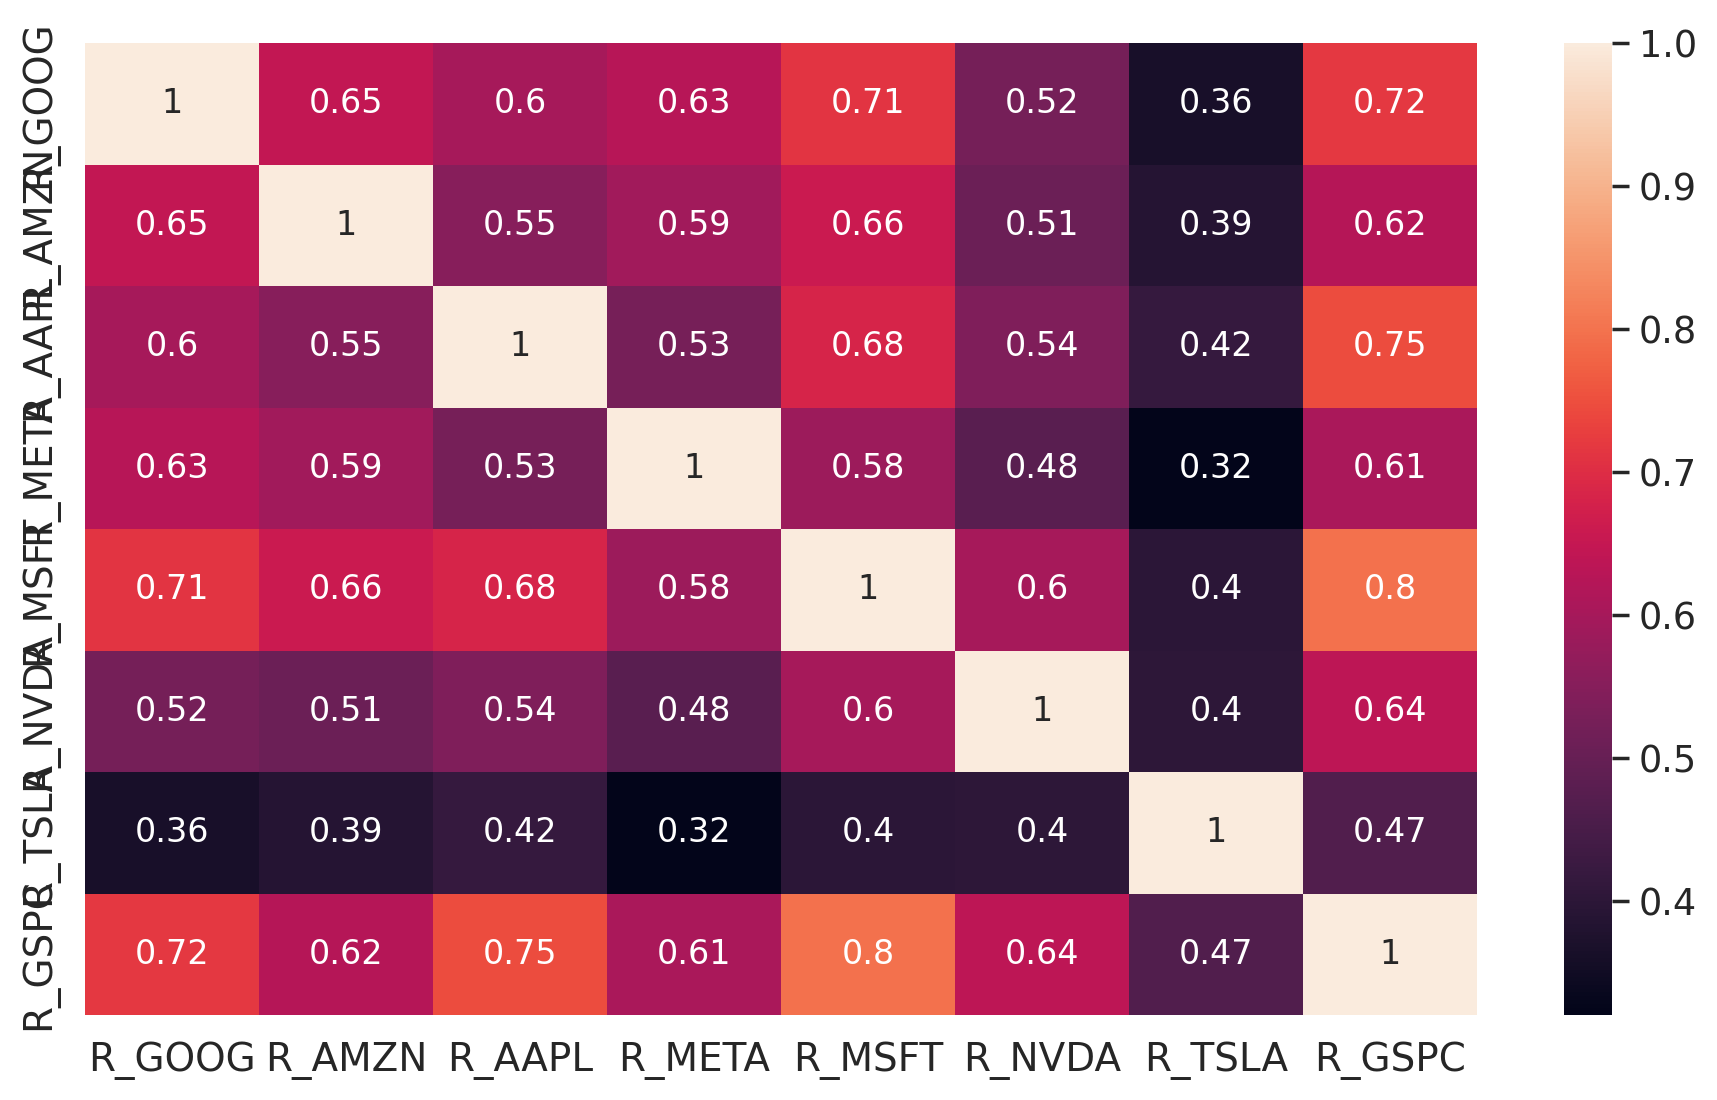

In [38]:
corr = dataset[['R_GOOG','R_AMZN','R_AAPL','R_META','R_MSFT','R_NVDA','R_TSLA', 'R_GSPC']].corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt. show()

> The correlation map of returns prices demonstrates a strong positive correlation between the returns of the S&P 500 and the returns of Microsoft and Apple. This indicates a tendency for the two to move in a similar direction, suggesting that overall market performance changes influence Microsoft's or Apple's stock returns.

*  $$\mbox{Annualized Volatility} = \mbox{Daily Volatility}_i \times \sqrt{252}= \mbox{Returns}_i\times \sqrt{252},$$
$$\;\;\;\;i=\{\mbox{GOOG}, \mbox{AMZN}, \mbox{AAPL}, \mbox{META},\mbox{MSFT}, \mbox{NVDA}, \mbox{TSLA}, \mbox{GSPC} \}$$



*  $$\mbox{Monthly volatility} = \mbox{Daily Volatility}_i \times \sqrt{21}= \mbox{Returns}_i\times \sqrt{21},$$
$$\;\;\;\;i=\{\mbox{GOOG}, \mbox{AMZN}, \mbox{AAPL}, \mbox{META},\mbox{MSFT}, \mbox{NVDA}, \mbox{TSLA}, \mbox{GSPC} \}$$


**Note**: There are 252 trading days per year and 21 trading days per month.

In [39]:
returns  = dataset[['R_GOOG','R_AMZN','R_AAPL','R_META','R_MSFT','R_NVDA','R_TSLA', 'R_GSPC']]
n_days = 252
for col in returns.columns:
    print("The volatility of the stock of", col, "=",round(returns[col].std()*np.sqrt(n_days)*100,2), '% per year')

The volatility of the stock of R_GOOG = 28.5 % per year
The volatility of the stock of R_AMZN = 32.78 % per year
The volatility of the stock of R_AAPL = 28.46 % per year
The volatility of the stock of R_META = 37.49 % per year
The volatility of the stock of R_MSFT = 27.14 % per year
The volatility of the stock of R_NVDA = 48.61 % per year
The volatility of the stock of R_TSLA = 57.16 % per year
The volatility of the stock of R_GSPC = 17.83 % per year


We can see that the annual volatility of Tesla ($57.16\%$) is higher than the other stocks.

In [40]:
returns  = dataset[['R_GOOG','R_AMZN','R_AAPL','R_META','R_MSFT','R_NVDA','R_TSLA', 'R_GSPC']]
n_days = 21
for col in returns.columns:
    print("The volatility of the stock of", col, "=",round(returns[col].std()*np.sqrt(n_days)*100,2), '% per month')

The volatility of the stock of R_GOOG = 8.23 % per month
The volatility of the stock of R_AMZN = 9.46 % per month
The volatility of the stock of R_AAPL = 8.22 % per month
The volatility of the stock of R_META = 10.82 % per month
The volatility of the stock of R_MSFT = 7.83 % per month
The volatility of the stock of R_NVDA = 14.03 % per month
The volatility of the stock of R_TSLA = 16.5 % per month
The volatility of the stock of R_GSPC = 5.15 % per month


We can see that Tesla's monthly volatility ($16.5\%$) is still higher than other stocks.

> Tesla exhibits higher annual volatility ($57.16\%$) than the other stocks, indicating more significant price fluctuations and potential risk. Even every month, Tesla's volatility ($16.5\%$) remains higher than the other stocks, suggesting higher price swings.

## Sharpe ratio

The Sharpe ratio measures the risk-adjusted return for companies like these stocks, and the S&P 500. By comparing their respective Sharpe ratios, we can assess the efficiency of each investment in generating returns relative to the level of risk. A higher Sharpe ratio indicates better risk-adjusted performance, implying that the acquisition provides higher returns for the risk taken. Analysing the Sharpe ratios of these companies and comparing them to the S&P 500 helps investors evaluate each investment option's relative attractiveness in balancing risk and return.

It is calculated by the formula below:

$$\mbox{Sharpe ratio}=\frac{R_p-R_f}{\sigma_p}$$

*  $R_p$ = Return of portfolio.

* $R_f$ = Risk-Free rate.

* $\sigma_p$ = Standard deviation of portfolio's excess return.


In [41]:
n_days = 252
def sharpe_ratio (serie, rf = 0.025):
    ''''
    serie : Series of daily returns of the stock or portfolio
    rf: annual return on a risk-free investment (default rf=0.025)
    '''''
    # Mean Annualized Return
    rp = serie.mean()*n_days
    # Annual volatility
    volatility = serie.std()*np.sqrt(n_days)
    # Sharpe ratio
    sharpe = (rp -rf) / volatility
    return sharpe

In [42]:
# Let's consider a risk-free investment with an annual return of 2.5% and
#we calculate the Sharpe Ratio of each stock
for col in returns.columns:
    print("The Sharpe ratio of,", col,"=", round(sharpe_ratio(returns[col]), 2))

The Sharpe ratio of, R_GOOG = 0.75
The Sharpe ratio of, R_AMZN = 0.9
The Sharpe ratio of, R_AAPL = 0.88
The Sharpe ratio of, R_META = 0.66
The Sharpe ratio of, R_MSFT = 0.91
The Sharpe ratio of, R_NVDA = 1.35
The Sharpe ratio of, R_TSLA = 0.82
The Sharpe ratio of, R_GSPC = 0.54


**Interpretation of the Sharpe Ratio**

The Sharpe ratio gives the excess return of a stock (or a portfolio) per unit of risk.

* The Sharpe ratio of the S\&P500 is equal to 0.54. Given a unit of risk, the S\&P500 has an excess annual return of $54\%$ compared to a risk-free investment with an annual return of $2.5\%$.

*  For the same unit of risk, NVIDIA has an annual excess return of $135\%$ compared to a risk-free investment with an annual return of $2.5\%$.

Under these conditions, the best stock is NVIDIA because it has the highest Sharpe ratio.

> The Sharpe ratio is a valuable metric for assessing the risk-adjusted performance of stocks or portfolios. In the case of the S&P 500, its Sharpe ratio is calculated to be 0.54. This implies that for a given unit of risk, the S&P 500 generates an excess annual return of $54\%$ compared to a risk-free investment with an annual return of $2.5\%$.

> When considering NVIDIA, its Sharpe ratio indicates an annual excess return of $135\%$ for the same level of risk. This means that NVIDIA has the potential to generate significantly higher returns relative to the risk-free investment compared to the S&P 500.

> Based on these findings, it can be concluded that NVIDIA exhibits the highest Sharpe ratio among the stocks analysed. This indicates that, for a given level of risk, NVIDIA has the potential to provide the best risk-adjusted returns. Therefore, regarding the Sharpe ratio, NVIDIA is the most favourable stock choice among the options considered.

## Beta of a security

Beta of the security measures how the given security performs in comparison to market, say S&P 500 (if you are calculating US Stock. Generally, each country has some index which represent the market). Beta tells the following,

* $\beta = 0$ No relation to the market (i.e S\&P500).

* $\beta = 1$ Performs same as the market.

* $\beta<1$ Lose less in recession and makes less in flourishing economy.

* $\beta>1$  Lose more in recession and makes more in flourinshing economy.

* $\beta<0$  Negatively related to market. That is, if market goes up, security (used interchangeably with stock) goes down and vice versa. Eg. GOLD, SILVER, precious metal etc.

We shall, try to find Beta for these stocks. To find beta one usually, considers last 5 year data with monthly period.

Can be calculated as follows:

$$\beta=\frac{\mbox{Cov}(\mbox{Stock}_i, S\&P500)}{\mbox{Var}(S\&P500)}$$

Where, $i=\mbox{GOOG}, \mbox{AMZN}, \mbox{AAPL}, \mbox{META}, \mbox{MSFT}, \mbox{NVDA}, \mbox{TSLA}$



In [43]:
cov = returns.cov() * 12 # annualized
cov

R_GOOG    R_AMZN    R_AAPL    R_META    R_MSFT    R_NVDA    R_TSLA  \
R_GOOG  0.003868  0.002877  0.002323  0.003190  0.002627  0.003461  0.002818   
R_AMZN  0.002877  0.005117  0.002459  0.003460  0.002788  0.003853  0.003459   
R_AAPL  0.002323  0.002459  0.003857  0.002675  0.002512  0.003550  0.003239   
R_META  0.003190  0.003460  0.002675  0.006693  0.002827  0.004152  0.003268   
R_MSFT  0.002627  0.002788  0.002512  0.002827  0.003507  0.003778  0.002953   
R_NVDA  0.003461  0.003853  0.003550  0.004152  0.003778  0.011251  0.005292   
R_TSLA  0.002818  0.003459  0.003239  0.003268  0.002953  0.005292  0.015559   
R_GSPC  0.001735  0.001739  0.001805  0.001928  0.001839  0.002626  0.002257   

          R_GSPC  
R_GOOG  0.001735  
R_AMZN  0.001739  
R_AAPL  0.001805  
R_META  0.001928  
R_MSFT  0.001839  
R_NVDA  0.002626  
R_TSLA  0.002257  
R_GSPC  0.001513

In [44]:
beta_GOOG = cov.iloc[0,7] / cov.iloc[7,7]
print(f'Beta (10Y period) of Google is : {beta_GOOG}')

Beta (10Y period) of Google is : 1.1460917853710804


In [45]:
beta_AMZN = cov.iloc[1,7] / cov.iloc[7,7]
print(f'Beta (10Y period) of Amazon is : {beta_AMZN}')

Beta (10Y period) of Amazon is : 1.1490969634789165


In [46]:
beta_AAPL = cov.iloc[2,7] / cov.iloc[7,7]
print(f'Beta (10Y period) of Apple is : {beta_AAPL}')

Beta (10Y period) of Apple is : 1.1925101820805413


In [47]:
beta_META = cov.iloc[3,7] / cov.iloc[7,7]
print(f'Beta (10Y period) of Facebook is : {beta_META}')

Beta (10Y period) of Facebook is : 1.2739053598826464


In [48]:
beta_MSFT = cov.iloc[4,7] / cov.iloc[7,7]
print(f'Beta (10Y period) of Microsoft is : {beta_MSFT}')

Beta (10Y period) of Microsoft is : 1.2150422478752383


In [49]:
beta_NVDA = cov.iloc[5,7] / cov.iloc[7,7]
print(f'Beta (10Y period) of NVIDIA is : {beta_NVDA}')

Beta (10Y period) of NVIDIA is : 1.7353066493472966


In [50]:
beta_TSLA = cov.iloc[6,7] / cov.iloc[7,7]
print(f'Beta (10Y period) of Tesla is : {beta_TSLA}')

Beta (10Y period) of Tesla is : 1.4913262555649247


In [51]:
beta_GSPC = cov.iloc[7,7] / cov.iloc[7,7]
print(f'Beta (10Y period) of S&P 500 is : {beta_GSPC}')

Beta (10Y period) of S&P 500 is : 1.0


**-----**
**PLEASE NOTE: You may ignore the following part of this notebook, please study the Session 0 - Python Basics as soon as possible by watching the YouTube playlist step by step, if you are feeling difficult to follow the above cells in this notebook. The following part shows some more advanced implementations, which mainly to visualize the portfolio optimization and hopefully will encourage students to learn Python asap in order to complete more challenging real-world problems.**
**-----**

# Portfolio Simulation

> In this part (you may ignore the following part if you need more time to learn the Python Basics in Session 0), we will perform a portfolio simulation for these seven stocks, along with the S\&P 500 market index. We are using Python's Scipy.optimize package. We will generate 10,000 portfolios by adjusting the asset allocation. The simulation considers historical returns, volatilities, and correlations to construct efficient portfolios. With a risk-free rate of $2.5\%$, we will evaluate the portfolios' performance relative to a risk-free investment. The analysis aims to understand diversification benefits and risk reduction, providing insights for constructing well-diversified portfolios aligned with investors' risk tolerance and return objectives.

In [52]:
from scipy.optimize import minimize

In [53]:
# Portfolio Simulation
portfolio        = 10000
n_assets         = returns.shape[1]
weights          = np.random.dirichlet(np.full(n_assets,0.05),portfolio)
mean_returns     = returns.mean()
sigma            = returns.cov()
expected_returns = np.zeros(portfolio)
expected_vol     = np.zeros(portfolio)
sharpe_ratio     = np.zeros(portfolio)
rf_rate          = 0.025                  # risk free rate = 0% as initial setting

for i in range(portfolio):
    w                   = weights[i,:]
    expected_returns[i] = np.sum(mean_returns @ w)*252
    expected_vol[i]     = np.sqrt(np.dot(w.T,sigma @ w))*np.sqrt(252)
    sharpe_ratio[i]     = (expected_returns[i]-rf_rate)/expected_vol[i]

In [54]:
weights[2,].sum()

np.float64(1.0)

In [55]:
def portfolio_volatility(weight):
    return np.sqrt(np.dot(weight.T, np.dot(sigma,weight)))*np.sqrt(252)

def portfolio_return(weight):
    return np.sum(mean_returns*weight)*252

def portfolio_performance(weight):
    return_p = portfolio_return(weight)
    vol_p    = portfolio_volatility(weight)
    return return_p, vol_p

In [56]:
def negativeSR(weight):
    return_p, vol_p = portfolio_performance(weight)
    rf_rate         = 0.025
    return -(return_p-rf_rate)/vol_p

def max_sharpe_ratio():

    def sum_one(weight):
        w= weight
        return np.sum(weight)-1

    n_assets           = returns.shape[1]
    weight_constraints = ({'type':'eq','fun': sum_one})
    w0                 = np.random.dirichlet(np.full(n_assets,0.05)).tolist()    # w0 is an initial guess

    return minimize(negativeSR,
                    w0,
                    method='SLSQP',
                    bounds=((0,1),)*n_assets,
                    constraints = weight_constraints)

In [57]:
def min_vol():

    n_assets           = returns.shape[1]
    weight_constraints = ({'type':'eq','fun': lambda x: np.sum(x)-1})
    w0                 = np.random.dirichlet(np.full(n_assets,0.05)).tolist()
    bounds             = ((0,1),)*n_assets

    return minimize(portfolio_volatility,
                    w0,
                    method = 'SLSQP',
                    bounds = bounds,
                    constraints = weight_constraints)

In [58]:
def efficient_portfolio_target(target):

    constraints = ({'type':'eq','fun': lambda x: portfolio_return(x)- target},
                  {'type' :'eq','fun': lambda x: np.sum(x)-1})
    w0          = np.random.dirichlet(np.full(n_assets,0.05)).tolist()
    bounds      = ((0,1),)*n_assets

    return minimize(portfolio_volatility,
                    w0,
                    method = 'SLSQP',
                    bounds = bounds,
                    constraints = constraints)

In [59]:
def efficient_frontier(return_range):
    return [efficient_portfolio_target(ret) for ret in return_range]

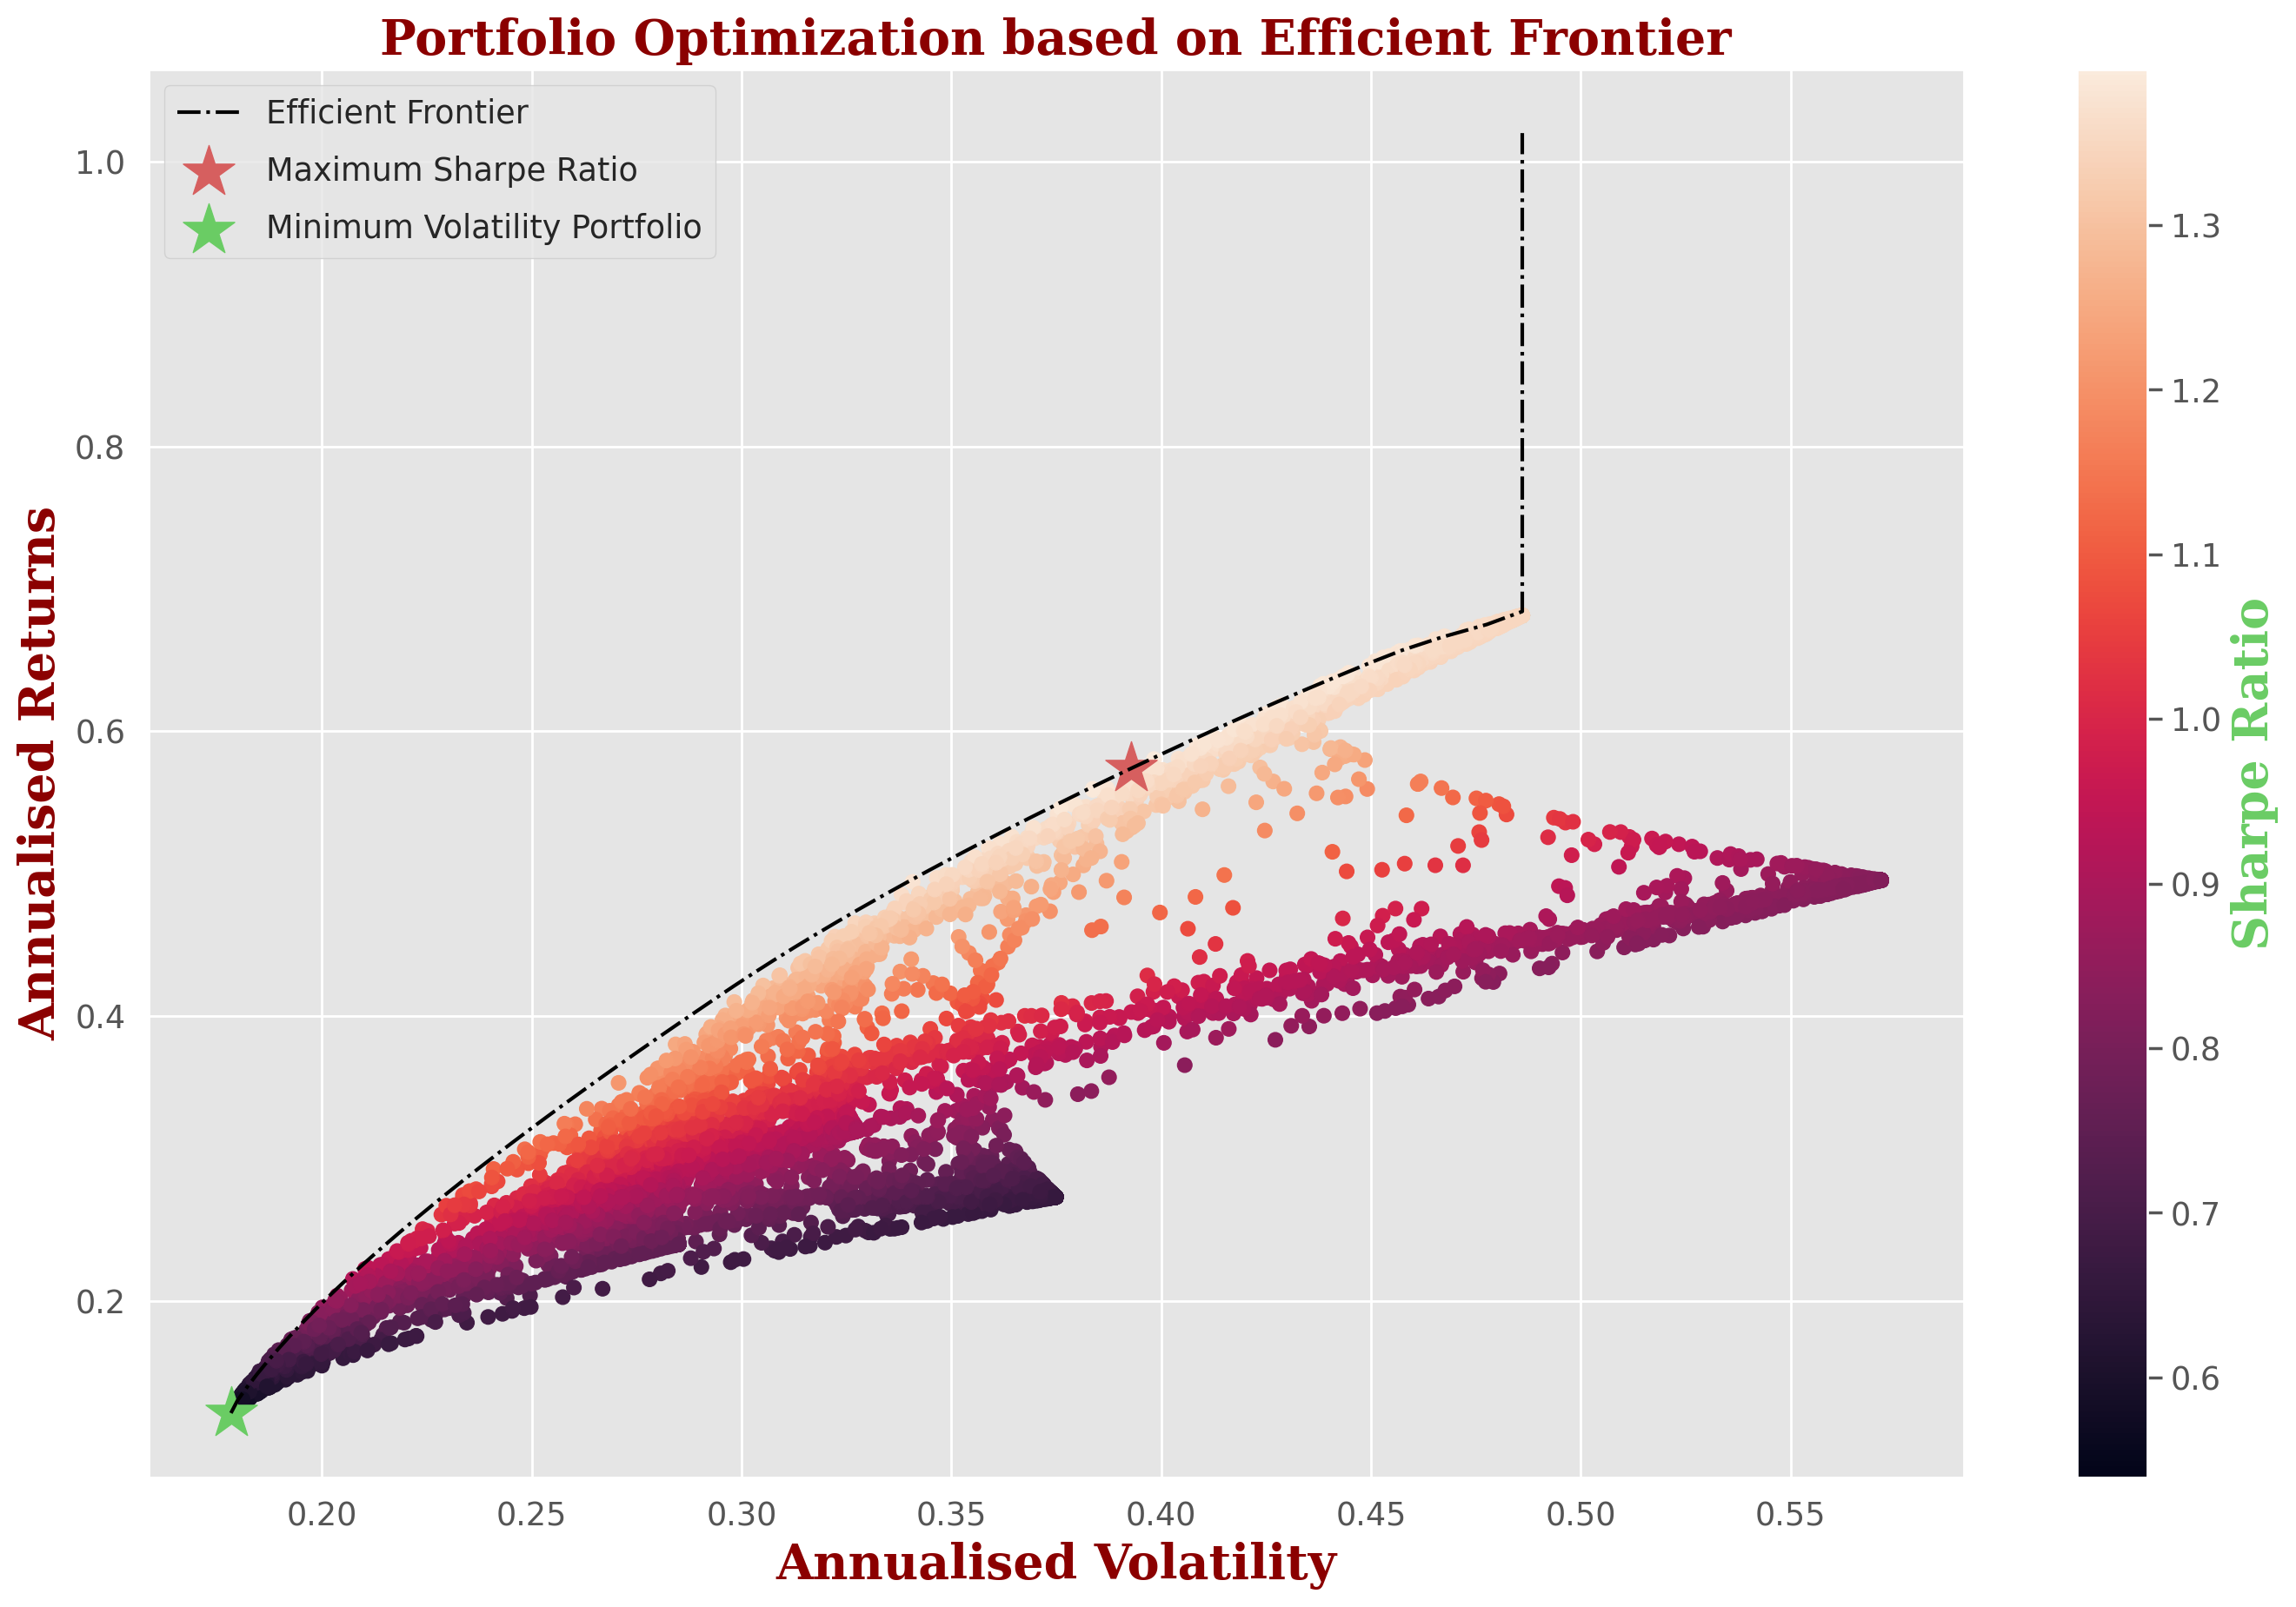

In [60]:
sharpe_maximum      = max_sharpe_ratio()
return_p,vol_p      = portfolio_performance(sharpe_maximum['x'])
min_volatility      = min_vol()
return_min,vol_min  = portfolio_performance(min_volatility['x'])

plt.figure(figsize =(15,10))
plt.style.use('ggplot')
plt.scatter(expected_vol, expected_returns, c=sharpe_ratio)
plt.colorbar().set_label('Sharpe Ratio', size=20, color='g', family='serif', weight='bold')
target               = np.linspace(return_min,1.02,100)
efficient_portfolios = efficient_frontier(target)
plt.plot([i.fun for i in efficient_portfolios], target, linestyle='dashdot', color='black', label='Efficient Frontier')
plt.scatter(vol_p, return_p, c='r', marker='*', s=500, label='Maximum Sharpe Ratio')
plt.scatter(vol_min, return_min, c='g', marker='*', s=500, label='Minimum Volatility Portfolio')

font1 = {'family':'serif','color':'darkred','size':20,'weight':'bold'}
font2 = {'family':'serif','color':'darkred','size':20,'weight':'bold'}
plt.title('Portfolio Optimization based on Efficient Frontier', fontdict=font1)
plt.xlabel('Annualised Volatility', fontdict=font2)
plt.ylabel('Annualised Returns', fontdict=font2)
plt.legend(labelspacing=0.8)
plt.show()

> Now, let's turn to the weights of the assets in the Magnificent Seven portfolios.

In [61]:
max_sharpe_weight = sharpe_maximum['x']
max_sharpe_weight_df = pd.DataFrame(max_sharpe_weight)

max_sharpe_weight_df = max_sharpe_weight_df.rename(columns={0: "Weight_SharpeRatio"},
                                                   index={0: "GOOG", 1: "AMZN", 2: "AAPL", 3: "META",
                                                          4: "MSFT", 5: "NVDA", 6: "TSLA", 7: "GSPC"})
max_sharpe_weight_df

Weight_SharpeRatio
GOOG        5.265160e-18
AMZN        1.702718e-01
AAPL        4.947997e-02
META        6.684185e-18
MSFT        1.310660e-17
NVDA        6.421267e-01
TSLA        1.381216e-01
GSPC        5.062963e-18

In [62]:
min_vol_weight = min_volatility['x']
min_vol_weight_df = pd.DataFrame(min_vol_weight)

min_vol_weight_df = min_vol_weight_df.rename(columns={0: "Weight_Volatility"},
                                             index={0: "GOOG", 1: "AMZN", 2: "AAPL", 3: "META",
                                                    4: "MSFT", 5: "NVDA", 6: "TSLA", 7: "GSPC"})
min_vol_weight_df

Weight_Volatility
GOOG       2.081668e-17
AMZN       0.000000e+00
AAPL       0.000000e+00
META       0.000000e+00
MSFT       0.000000e+00
NVDA       0.000000e+00
TSLA       1.734723e-17
GSPC       1.000000e+00

In [63]:
return_p

np.float64(0.5738876463303945)

In [64]:
vol_p

np.float64(0.3928462566276528)

In [65]:
rf_rate = 0.025
(return_p-rf_rate)/vol_p

np.float64(1.3972072714711918)

In [66]:
return_min

np.float64(0.1211885414037762)

In [67]:
vol_min

np.float64(0.17827684059062934)

In [68]:
rf_rate = 0.025
(return_min-rf_rate)/vol_min

np.float64(0.5395459168173754)

> Looking at the table of weights in a portfolio with the highest Sharpe ratio, we can see that NIVDIA has a higher weight than the other companies. In comparison, Tesla has a lower weight in a minimum variance portfolio. We can conclude that the better portfolio among these two weights is the one with high risk. If we consider the risk-adjusted return, this portfolio gave the highest Sharpe ratio ($1.40$) compared to the minimum variance portfolio ($0.54$), which means that it is the one for which the investor will receive the highest excess return for the additional risk he/she will take.

# Conclusion

> In conclusion, the analysis of the stock market data for the Magnificant Seven stocks (Google, Amazon, Apple, Facebook/Meta, Microsoft, NVIDIA and Tesla) and the S\&P500 stock index has provided valuable insights.

* **Volatility**: The examination of annual and monthly volatilities revealed that Tesla exhibited the highest volatility among these stocks, indicating greater price fluctuations and potential risk. This information can assist investors in understanding the risk profiles of these stocks and making informed investment decisions.

* **Correlation**: The correlation analysis indicated strong positive correlations between the S&P 500 and these stocks (except Tesla). These correlations suggest potential interdependencies and can guide portfolio diversification strategies.

* **Risk-Adjusted Returns**: The evaluation of the Sharpe ratios offered insights into the risk-adjusted performance of the stocks. NVIDIA emerged as the stock with the highest Sharpe ratio, indicating the potential for generating better risk-adjusted returns compared to the other stocks and the risk-free investment.

> Overall, these findings highlight the importance of considering factors such as volatility, correlation, and risk-adjusted returns when analyzing and selecting stocks for investment purposes. By taking into account these key metrics, investors can make more informed decisions, manage risk effectively, and potentially optimize their investment portfolios.

# References

- [Session 0 Python Basics YouTube playlist](https://www.youtube.com/playlist?list=PLHHpSPMS-hkgHg3IaRMUpp9_XD1ndthg6)

- [Session 1 Introduction to Data Science in Asset Management YouTube playlist](https://www.youtube.com/playlist?list=PLHHpSPMS-hkgPYHIilA-Ag-duv9Z4xSr9)

- [Risk Parity Portfolio based on General Risk Measures](https://openaccess.city.ac.uk/id/eprint/33733/1/Risk_Parity_APTZ_CRO_2.pdf)

- [Kaggle](https://www.kaggle.com)

- [How Volatility Affects a Stock’s Return: Tested with Python](https://medium.com/analytics-vidhya/how-volatility-affects-a-stocks-return-tested-with-python-cdf7470d3808)
- [Beta of a Stock & CAPM from Scratch](https://www.kaggle.com/code/bhavinmoriya/beta-of-a-stock-capm-from-scratch)

- [Use Python to calculate the Sharpe ratio for a portfolio](https://towardsdatascience.com/calculating-sharpe-ratio-with-python-755dcb346805)

- [Portfolio Management using Python — Portfolio Optimization](https://pub.towardsai.net/portfolio-management-using-python-portfolio-optimization-8a90dd2a21d)
- [Volatility And Measures Of Risk-Adjusted Return With Python](https://blog.quantinsti.com/volatility-and-measures-of-risk-adjusted-return-based-on-volatility/)

- [Portfolio Optimization with Python using Efficient Frontier with Practical Examples](https://www.machinelearningplus.com/machine-learning/portfolio-optimization-python-example/)

- [Efficient Frontier in Python — Detailed Tutorial](https://towardsdatascience.com/efficient-frontier-in-python-detailed-tutorial-84a304f03e79)

- [Portfolio Optimization using MPT in Python](https://www.analyticsvidhya.com/blog/2021/04/portfolio-optimization-using-mpt-in-python/)

- [The Efficient Frontier-Markowitz portfolio optimization in Python](https://github.com/aghanhussain/Markowitz-Portfolio-Optimization-with-Python/blob/master/The%20Efficient%20Frontier-Markowitz%20portfolio%20optimization%20in%20Python.ipynb)

- [Simulating Thousands of Random Portfolios to Illustrate the Efficient Frontier using Python](https://www.interviewqs.com/blog/efficient-frontier)
